In [1]:
import numpy as np
import numpy_indexed as npi
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
#from pyppca import ppca
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, ExpSineSquared
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.linear_model._glm.glm import PoissonRegressor, GammaRegressor, TweedieRegressor
from sklearn.linear_model._coordinate_descent import Lasso
from sklearn.model_selection import KFold
#from chord import Chord
import itertools
#import holoviews as hv
#from bokeh.sampledata.les_mis import data
#from holoviews import opts, dim
import random
from sklearn.metrics.pairwise import rbf_kernel
from scipy.special import gamma,psi
from scipy import ndimage
from scipy.linalg import det
from numpy import pi
from sklearn.neighbors import NearestNeighbors
from scipy.stats import entropy
from sklearn.model_selection import cross_validate
#from hyppo.independence import Hsic
from numpy.random import randint
import multiprocessing
import sys
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import linear_model
#from RegscorePy import *
from sklearn.decomposition import PCA
#import plotly.express as px
from matplotlib.dates import date2num
import pycountry
import pycountry_convert as pc
#from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from methods.feature_permutation import FeaturePermutation
from methods.partial_dependency import PDP
from methods.shap import Shap
import dataframe_image as dfi
import matplotlib.gridspec as gridspec
from matplotlib import rcParams

In [2]:
from __future__ import division
from scipy.stats import gamma

In [3]:
pd.set_option('display.max_columns', None)  

In [164]:
db = pd.read_csv("/Users/Michele/Desktop/ISP/projects/deepcube/uc2_data_preparation/Global_Disaster_Database_V5.csv")

In [165]:
db.head()

,Unnamed: 0,iso3,country,figure,hazard_type,start_date,NDVI_Median,NDVI_Mean,Precipitation_MaxMax,Precipitation_SumMax,Wind_Speed_Max,Total_Population_Count,gHM,Elev_Mean,Elev_Max,awi_mean,rwi_mean,awi_min,rwi_min,awi_max,rwi_max,awi_std,rwi_std,awi_median,rwi_median,Agricultural land (% of land area),CO2 emissions (kg per PPP $ of GDP),Cereal yield (kg per hectare),"Birth rate, crude (per 1,000 people)",Land area (sq. km),Land under cereal production (hectares),Net official development assistance received (constant 2018 US$),"Population, total",Rural population (% of total population),Renewable energy consumption (% of total final energy consumption),Merchandise trade (% of GDP),Adjusted savings: education expenditure (% of GNI)
0,0,HND,Honduras,17574,Storm,2020-12-01,5855.288537,5409.399006,0.297215,9.388454,21.390010,1.801930e+06,0.365140,347.284175,2389.0,246.393375,-0.075326,0.901530,-1.062,388.667662,1.514,114.162225,0.519794,275.165021,-0.1940,29.868621,0.181262,1851.366667,21.73125,111890.0,4.053477e+05,5.061400e+08,9587611.2,42.9090,49.693067,82.866130,6.330000
1,2,UZB,Uzbekistan,70000,Flood,2020-05-01,6047.518561,5550.879269,0.255402,6.588300,15.592066,6.256620e+05,0.723868,283.296582,577.0,151.457700,-0.110201,0.232705,-1.159,292.496485,1.480,84.168183,0.421391,156.856853,-0.1565,58.076536,0.513850,4352.133333,23.12500,440568.0,3.075375e+06,7.289250e+08,33001000.0,49.4946,1.628033,47.622165,9.374764
2,3,HND,Honduras,743426,Storm,2020-11-14,5855.777875,5384.789733,0.357824,35.369101,24.188273,7.492123e+06,0.247552,628.817998,2845.0,194.844004,-0.304085,0.036061,-1.404,388.992213,1.735,112.316066,0.405426,195.018994,-0.3900,29.868621,0.181262,1851.366667,21.73125,111890.0,4.053477e+05,5.061400e+08,9587611.2,42.9090,49.693067,82.866130,6.330000
3,9,ZMB,Zambia,814,Flood,2020-12-22,5791.221550,5334.470481,0.285422,10.875886,19.665589,1.327684e+06,0.221535,1140.888702,1875.0,87.908828,-0.424108,0.031631,-1.231,172.888291,1.503,48.623704,0.271690,89.037859,-0.4480,32.063923,0.114348,2352.000000,36.48975,743390.0,1.355510e+06,1.020680e+09,17362752.2,56.4728,85.127965,65.254422,3.563864
4,12,MEX,Mexico,15238,Storm,2020-11-02,5856.108449,5450.355122,0.341338,11.899004,25.684494,4.638016e+06,0.475133,767.500535,4046.0,423.335195,-0.313007,0.161713,-1.203,1243.327857,1.499,312.791837,0.369609,355.881071,-0.3800,54.673388,0.192506,3791.566667,17.76550,1943950.0,9.851122e+06,6.894500e+08,126161953.8,19.8450,9.461000,73.700839,4.617882


In [166]:
 db['NDVI'] =  db['NDVI_Mean']/(10**4)

In [167]:
db["kNDVI"] = db['NDVI'].apply(lambda x: np.tanh(x**2))

In [168]:
db['logPop'] =  np.log10(db['Total_Population_Count'])

In [169]:
print(db.columns)

Index(['Unnamed: 0', 'iso3', 'country', 'figure', 'hazard_type', 'start_date',
       'NDVI_Median', 'NDVI_Mean', 'Precipitation_MaxMax',
       'Precipitation_SumMax', 'Wind_Speed_Max', 'Total_Population_Count',
       'gHM', 'Elev_Mean', 'Elev_Max', 'awi_mean', 'rwi_mean', 'awi_min',
       'rwi_min', 'awi_max', 'rwi_max', 'awi_std', 'rwi_std', 'awi_median',
       'rwi_median', 'Agricultural land (% of land area)',
       'CO2 emissions (kg per PPP $ of GDP)', 'Cereal yield (kg per hectare)',
       'Birth rate, crude (per 1,000 people)', 'Land area (sq. km)',
       'Land under cereal production (hectares)',
       'Net official development assistance received (constant 2018 US$)',
       'Population, total', 'Rural population (% of total population)',
       'Renewable energy consumption (% of total final energy consumption)',
       'Merchandise trade (% of GDP)',
       'Adjusted savings: education expenditure (% of GNI)', 'NDVI', 'kNDVI',
       'logPop'],
      dtype='object')

In [170]:
ratio = db["figure"]/db['Total_Population_Count']

In [171]:
ratio[ratio>1]

288     1.229597
565     5.410799
1273    1.129544
1776    1.016817
1932    2.997146
dtype: float64

In [172]:
db[db["figure"]/db['Total_Population_Count']>1]

,Unnamed: 0,iso3,country,figure,hazard_type,start_date,NDVI_Median,NDVI_Mean,Precipitation_MaxMax,Precipitation_SumMax,Wind_Speed_Max,Total_Population_Count,gHM,Elev_Mean,Elev_Max,awi_mean,rwi_mean,awi_min,rwi_min,awi_max,rwi_max,awi_std,rwi_std,awi_median,rwi_median,Agricultural land (% of land area),CO2 emissions (kg per PPP $ of GDP),Cereal yield (kg per hectare),"Birth rate, crude (per 1,000 people)",Land area (sq. km),Land under cereal production (hectares),Net official development assistance received (constant 2018 US$),"Population, total",Rural population (% of total population),Renewable energy consumption (% of total final energy consumption),Merchandise trade (% of GDP),Adjusted savings: education expenditure (% of GNI),NDVI,kNDVI,logPop
288,602,NGA,Nigeria,1710,Flood,2020-09-07,5983.384625,5480.036881,0.271356,12.381546,19.066055,1.390699e+03,0.619496,291.850176,301.0,302.149768,0.295333,215.260775,-0.331,351.098755,0.818,75.449137,0.581473,340.089774,0.3990,75.716318,0.117244,1467.633333,38.15200,910770.0,1.821847e+07,3.253277e+09,1.959623e+08,49.6678,81.586866,22.122359,0.850000,0.548004,0.291594,3.143233
565,1224,IDN,Indonesia,3617,Flood,2020-04-28,6047.518561,5550.879269,0.410815,6.622462,16.200960,6.684780e+02,0.198207,515.649091,1010.0,267.388668,-0.333692,90.968542,-0.639,434.471139,-0.008,117.342632,0.207963,286.933196,-0.3140,32.809255,0.183847,5219.766667,18.25750,1877519.0,2.084036e+07,1.666625e+08,2.676054e+08,44.6802,24.710500,31.325849,3.267277,0.555088,0.298728,2.825087
1273,3062,PHL,Philippines,106475,Flood,2019-01-22,5471.758812,5072.651130,0.212181,11.955581,21.955819,9.426371e+04,0.261521,570.808308,2246.0,173.824789,-0.462030,0.221562,-1.316,522.013842,1.090,125.720406,0.333436,140.740943,-0.5305,41.721166,0.156428,3630.600000,20.84275,298170.0,7.239026e+06,4.841850e+08,1.066372e+08,53.0758,23.528867,49.020248,1.840000,0.507265,0.251785,4.974345
1776,4601,IND,India,1343879,Flood,2017-06-01,5727.476538,5339.619974,0.515786,164.209006,30.292505,1.321652e+06,0.362857,1376.184799,4697.0,87.302289,-0.469875,5.778743,-0.830,188.073223,-0.137,77.321944,0.270525,74.915427,-0.4820,60.431389,0.276646,3139.500000,17.97900,2973190.0,9.873267e+07,2.789615e+09,1.352452e+09,65.9580,32.488067,27.910920,3.080000,0.533962,0.277633,6.121117
1932,5608,COD,Dem. Rep. Congo,217317,Flood,2021-01-01,5984.103889,5368.347799,0.406842,105.047655,25.896030,7.250798e+04,0.268565,1789.659292,3230.0,81.693786,-0.129134,10.164404,-0.739,103.361277,0.637,20.140564,0.257666,87.239771,-0.1680,13.968226,0.025698,769.533333,41.45800,2267050.0,3.993894e+06,2.551897e+09,8.412159e+07,55.5338,96.704865,31.160049,2.060000,0.536835,0.280469,4.860386


In [173]:
db = db[db["figure"]/db['Total_Population_Count']<=1]

In [174]:
db.columns

Index(['Unnamed: 0', 'iso3', 'country', 'figure', 'hazard_type', 'start_date',
       'NDVI_Median', 'NDVI_Mean', 'Precipitation_MaxMax',
       'Precipitation_SumMax', 'Wind_Speed_Max', 'Total_Population_Count',
       'gHM', 'Elev_Mean', 'Elev_Max', 'awi_mean', 'rwi_mean', 'awi_min',
       'rwi_min', 'awi_max', 'rwi_max', 'awi_std', 'rwi_std', 'awi_median',
       'rwi_median', 'Agricultural land (% of land area)',
       'CO2 emissions (kg per PPP $ of GDP)', 'Cereal yield (kg per hectare)',
       'Birth rate, crude (per 1,000 people)', 'Land area (sq. km)',
       'Land under cereal production (hectares)',
       'Net official development assistance received (constant 2018 US$)',
       'Population, total', 'Rural population (% of total population)',
       'Renewable energy consumption (% of total final energy consumption)',
       'Merchandise trade (% of GDP)',
       'Adjusted savings: education expenditure (% of GNI)', 'NDVI', 'kNDVI',
       'logPop'],
      dtype='object')

In [175]:
db = db.drop(['Unnamed: 0', 'rwi_mean', 'rwi_min', 'rwi_max', 'rwi_std', 'rwi_median', 
              'CO2 emissions (kg per PPP $ of GDP)', 'Cereal yield (kg per hectare)', 'Precipitation_MaxMax',
       'Birth rate, crude (per 1,000 people)', 'Land area (sq. km)', 'NDVI_Median', 'NDVI_Mean', 'NDVI',
       'Land under cereal production (hectares)',  'awi_median', 'awi_min', 
       'Net official development assistance received (constant 2018 US$)',
       'Population, total', 'Rural population (% of total population)', 'Total_Population_Count',
       'Renewable energy consumption (% of total final energy consumption)',
       'Merchandise trade (% of GDP)','Elev_Max', 'awi_mean', 'awi_std'], axis=1)

In [176]:
db.columns

Index(['iso3', 'country', 'figure', 'hazard_type', 'start_date',
       'Precipitation_SumMax', 'Wind_Speed_Max', 'gHM', 'Elev_Mean', 'awi_max',
       'Agricultural land (% of land area)',
       'Adjusted savings: education expenditure (% of GNI)', 'kNDVI',
       'logPop'],
      dtype='object')

In [177]:
db = db.dropna()

In [178]:
len(db)

2400

In [179]:
db["Wind_Speed_Max"].max()

36.02876491979675

In [180]:
db["Precipitation_SumMax"].max()

307.2183907185025

In [181]:
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]    

def country_flag(df):
    if df['iso3'] in list_alpha_3:
        return pycountry.countries.get(alpha_3=df['iso3']).name
    else:
        return 'Invalid Code'
    
def country_to_continent(df):
    try:
        country = pycountry.countries.get(alpha_3=df["iso3"])
        country_alpha2 = country.alpha_2
        try:
            country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
            country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
            return country_continent_name
        except KeyError:
            return "None"
    except AttributeError :
        return "None"

In [182]:
db["continent"] = db.apply(country_to_continent, axis = 1)

In [183]:
db[db["continent"]=='None']

,iso3,country,figure,hazard_type,start_date,Precipitation_SumMax,Wind_Speed_Max,gHM,Elev_Mean,awi_max,Agricultural land (% of land area),Adjusted savings: education expenditure (% of GNI),kNDVI,logPop,continent


In [184]:
db["continent"].unique()

array(['North America', 'Asia', 'Africa', 'South America'], dtype=object)

In [185]:
db["year"] = pd.to_datetime(db['start_date']).dt.year

In [186]:
db["year"].value_counts()

2020    667
2019    644
2021    611
2018    467
2016      9
2017      2
Name: year, dtype: int64

In [187]:
years = pd.to_datetime(db['start_date']).dt.year

In [188]:
db.rename(columns={"figure": "IDP"}, inplace=True)

In [189]:
startd, idpt = list(zip(*sorted(zip(years, db["IDP"]))))

In [190]:
precmax_yr = [db[db["year"]==i]["Precipitation_SumMax"] for i in sorted(db["year"].unique())]

In [191]:
idp_yr = [db[db["year"]==i]["IDP"] for i in sorted(db["year"].unique())]

In [192]:
db["hazard_type"].unique()

array(['Storm', 'Flood', 'Wet mass movement', 'Mass movement'],
      dtype=object)

In [193]:
db[db["hazard_type"]=='Wet mass movement'].groupby(['continent'])['IDP'].agg('sum')

continent
Africa           30172
Asia             93157
North America     2498
South America    13573
Name: IDP, dtype: int64

In [194]:
db["hazard_type"] = db["hazard_type"].apply(lambda x: "Landslide" if x=="Mass movement" else x)
db["hazard_type"] = db["hazard_type"].apply(lambda x: "Landslide" if x=="Wet mass movement" else x)


In [195]:
db["hazard_type"].unique()

array(['Storm', 'Flood', 'Landslide'], dtype=object)

In [196]:
asia = []
africa = []
nam = []
sam = []

for i in db["hazard_type"].unique():
    print(i)
    idpdis = db[db["hazard_type"]==i].groupby(['continent'])['IDP'].agg('sum')
    asia.append(idpdis["Asia"])
    africa.append(idpdis["Africa"])
    nam.append(idpdis["North America"])
    sam.append(idpdis["South America"])

Storm
Flood
Landslide


## Set default parameters for all plots

In [197]:
font_size = 24
#plt.style.use('seaborn')
# plt.rc('font', size=font_size)        # default text size (won't work)
plt.rc('axes', titlesize=font_size)   # title
plt.rc('axes', labelsize=font_size)   # x and y labels
plt.rc('xtick', labelsize=font_size)  # x tick labels
plt.rc('ytick', labelsize=font_size)  # y tick labels
plt.rc('legend', fontsize=font_size)  # legend
plt.rc('lines', markersize=16)        # marker size

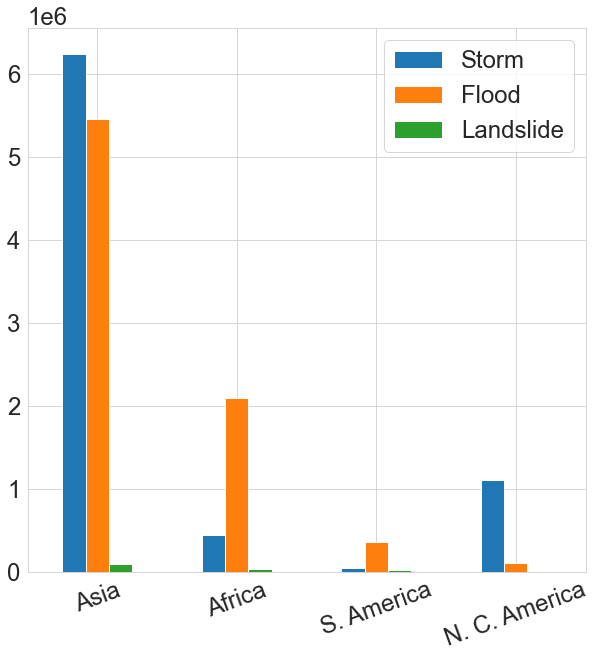

In [198]:
data = [["Asia"]+asia,
        ["Africa"]+africa,
        ["S. America"]+sam,
        ["N. C. America"]+nam
       ]

df = pd.DataFrame(data,columns=["","Storm","Flood","Landslide"])
df.plot(x="", y=["Storm","Flood","Landslide"], kind="bar", figsize=(10,10), rot=20)
plt.savefig("./agu_plots/distr_per_continent_21.pdf")
plt.show()

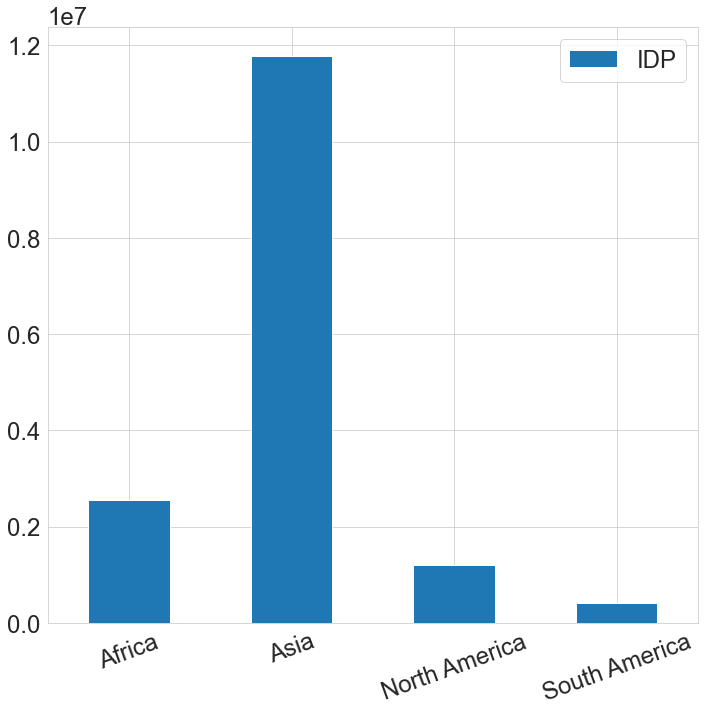

In [199]:
df = pd.DataFrame({'':list(db.groupby(['continent'])['IDP'].agg('sum').index.values), 'IDP':list(db.groupby(['continent'])['IDP'].agg('sum').values)})
df.plot.bar(x='', y='IDP', rot=20, figsize=(10,10))
plt.tight_layout()
plt.savefig("./agu_plots/idp_per_continent_21.pdf")
plt.show()

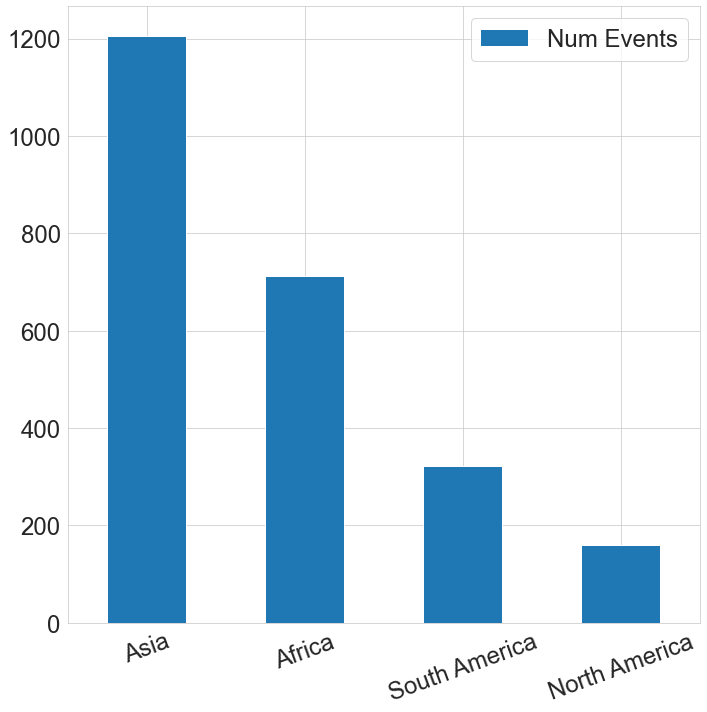

In [200]:
df = pd.DataFrame({'':list(db["continent"].value_counts().index.values), 'Num Events':list(db["continent"].value_counts().values)})
df.plot.bar(x='', y='Num Events', figsize=(10,10), rot=20, grid=True)
plt.tight_layout()
plt.savefig("./agu_plots/events_per_continent_21.pdf")
plt.show()

In [201]:
dbp = db[db["IDP"]!=0]

In [202]:
len(dbp)

2399

In [203]:
dbp["logIDP"] = np.log10(dbp["IDP"])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


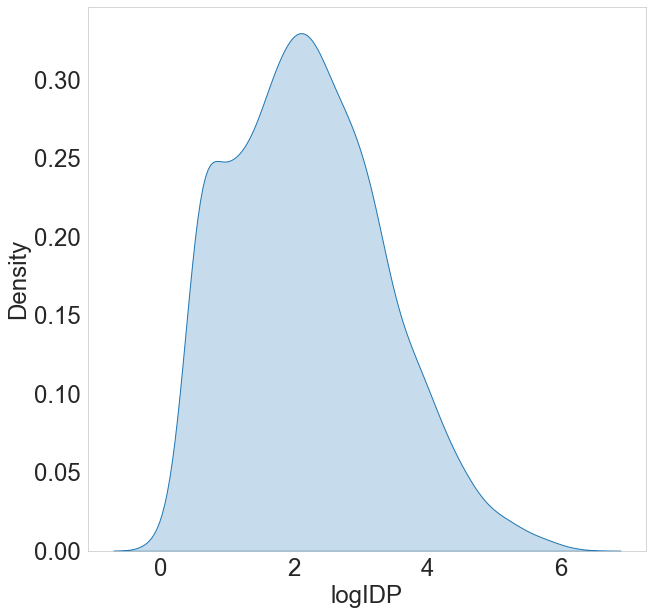

In [204]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(ax=ax, data=dbp, x="logIDP", fill=True)
plt.grid()
plt.savefig("./agu_plots/logidp_distr_21.pdf")

Corr =  0.9389490802759053


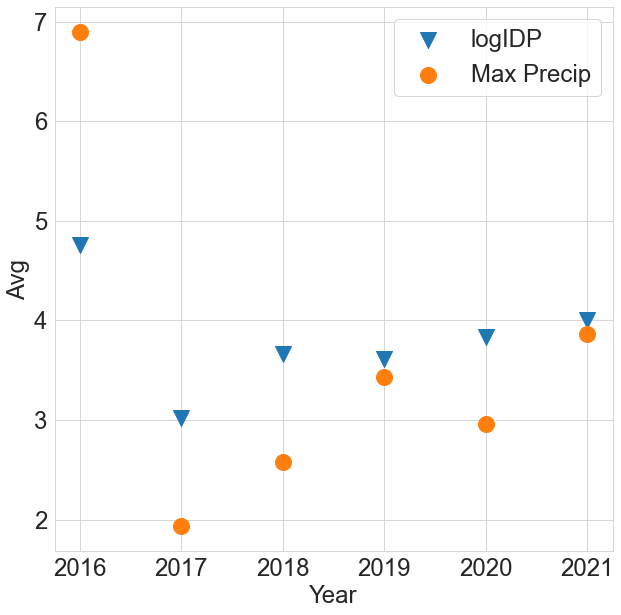

In [205]:
maxidp_yr = [np.mean(dbp[dbp["year"]==i]["IDP"]) for i in sorted(dbp["year"].unique())]
maxprec_yr = [np.mean(dbp[dbp["year"]==i]["Precipitation_SumMax"]) for i in sorted(dbp["year"].unique())]
logmaxidp_yr = np.log10(np.array(maxidp_yr))
print("Corr = ", np.corrcoef(maxprec_yr, logmaxidp_yr)[0,1])

plt.figure(figsize=(10,10))
plt.scatter(range(1,len(maxprec_yr)+1), logmaxidp_yr, marker = "v", label='logIDP')
plt.scatter(range(1,len(maxprec_yr)+1), np.array(maxprec_yr)/5, label='Max Precip')
plt.xticks(list(range(1,len(maxprec_yr)+1)), sorted(dbp["year"].unique()))
plt.xlabel("Year")
plt.ylabel("Avg")
plt.legend(loc='upper right')
#plt.savefig("./agu_plots/avg_prep_idp_21.pdf")

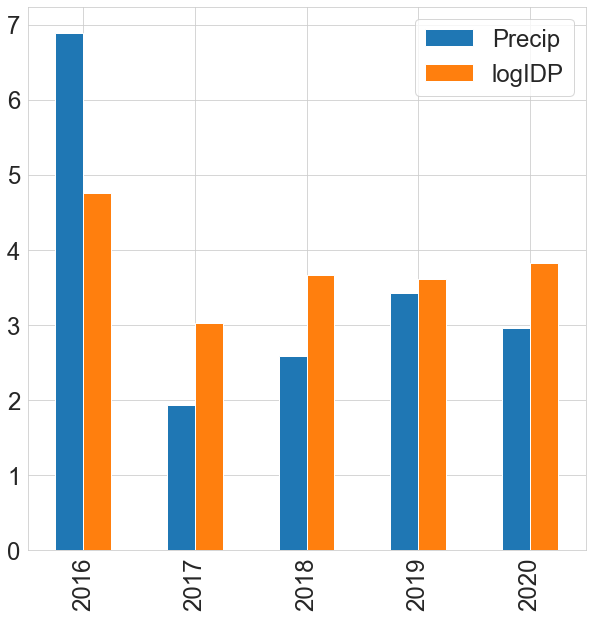

In [206]:
yr = [2016, 2017, 2018, 2019, 2020, 2021]
data = []
for i in range(5):
    data.append([yr[i], maxprec_yr[i]/5, logmaxidp_yr[i]])

df = pd.DataFrame(data,columns=["", "Precip", "logIDP"])
df.plot(x="", y=["Precip","logIDP"], kind="bar",figsize=(10,10))
#plt.savefig("./agu_plots/idp_precip_21.pdf")
plt.show()

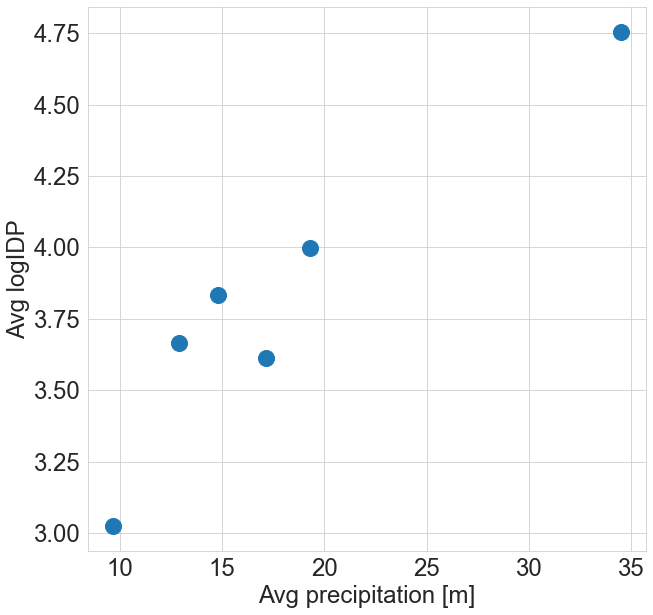

In [210]:
plt.figure(figsize=(10,10))
plt.scatter(np.array(maxprec_yr), logmaxidp_yr)
plt.xlabel("Avg precipitation [m]")
plt.ylabel("Avg logIDP")
plt.grid(True)
plt.savefig("./agu_plots/scatter_prep_idp_21.pdf")

## A short of bootstrap to see how many times the corr. coef. is larger than 0.97

In [58]:
%%time
trials = 10000
cc = np.zeros(trials)
for i in range(trials):
    dbp = db.dropna(subset=["Precipitation_SumMax", "IDP"])
    dbp["ran"] = np.random.permutation(dbp["Precipitation_SumMax"].values)
    maxidp_yr = [np.mean(dbp[dbp["year"]==i]["IDP"]) for i in sorted(dbp["year"].unique())]
    maxprec_yr = [np.mean(dbp[dbp["year"]==i]["ran"]) for i in sorted(dbp["year"].unique())]
    logmaxidp_yr = np.log10(np.array(maxidp_yr)) / 15
    cc[i] = np.corrcoef(maxprec_yr, logmaxidp_yr)[0,1]
    # print("Corr =", cc)

print('Avg CC', np.sum(cc) / trials)
print('C >= 0.94', np.sum([cc >= 0.94]))

Avg CC 0.1139207094247872
C >= 0.94 706
CPU times: user 1min 48s, sys: 920 ms, total: 1min 49s
Wall time: 1min 54s


In [59]:
np.sum([cc >= 0.94])/trials

0.0706

In [77]:
db1 = dbp

In [78]:
len(db1)

2399

In [79]:
db1.columns

Index(['iso3', 'country', 'IDP', 'hazard_type', 'start_date',
       'Precipitation_SumMax', 'Wind_Speed_Max', 'gHM', 'Elev_Mean', 'awi_max',
       'Agricultural land (% of land area)',
       'Adjusted savings: education expenditure (% of GNI)', 'kNDVI', 'logPop',
       'continent', 'year', 'logIDP'],
      dtype='object')

In [80]:
db2 = db1.drop(['IDP', 'iso3', 'start_date', 'country', 'hazard_type', 'continent', 'year'], axis=1)

In [81]:
db2.columns

Index(['Precipitation_SumMax', 'Wind_Speed_Max', 'gHM', 'Elev_Mean', 'awi_max',
       'Agricultural land (% of land area)',
       'Adjusted savings: education expenditure (% of GNI)', 'kNDVI', 'logPop',
       'logIDP'],
      dtype='object')

In [82]:
db2.columns = ['Precipitation', 'WS', 'gHM', 'Elevation', 'AWI',
       '%AgriLand','%EduExp', 'kNDVI', 'Population', 'IDP']

In [83]:
list(zip(['Precipitation_SumMax', 'Wind_Speed_Max', 'gHM', 'Elev_Mean', 'awi_max',
       'Agricultural land (% of land area)',
       'Adjusted savings: education expenditure (% of GNI)', 'kNDVI', 'logPop',
       'logIDP'], list(db2.columns)))

[('Precipitation_SumMax', 'Precipitation'),
 ('Wind_Speed_Max', 'WS'),
 ('gHM', 'gHM'),
 ('Elev_Mean', 'Elevation'),
 ('awi_max', 'AWI'),
 ('Agricultural land (% of land area)', '%AgriLand'),
 ('Adjusted savings: education expenditure (% of GNI)', '%EduExp'),
 ('kNDVI', 'kNDVI'),
 ('logPop', 'Population'),
 ('logIDP', 'IDP')]

In [84]:
X_db = db2[db2.columns.drop('IDP')]

In [85]:
Y_db = db2["IDP"]

In [86]:
features = list(X_db.columns)

In [87]:
scaler = StandardScaler()
scaler.fit(X_db)
X_n = scaler.transform(X_db)

In [88]:
features

['Precipitation',
 'WS',
 'gHM',
 'Elevation',
 'AWI',
 '%AgriLand',
 '%EduExp',
 'kNDVI',
 'Population']

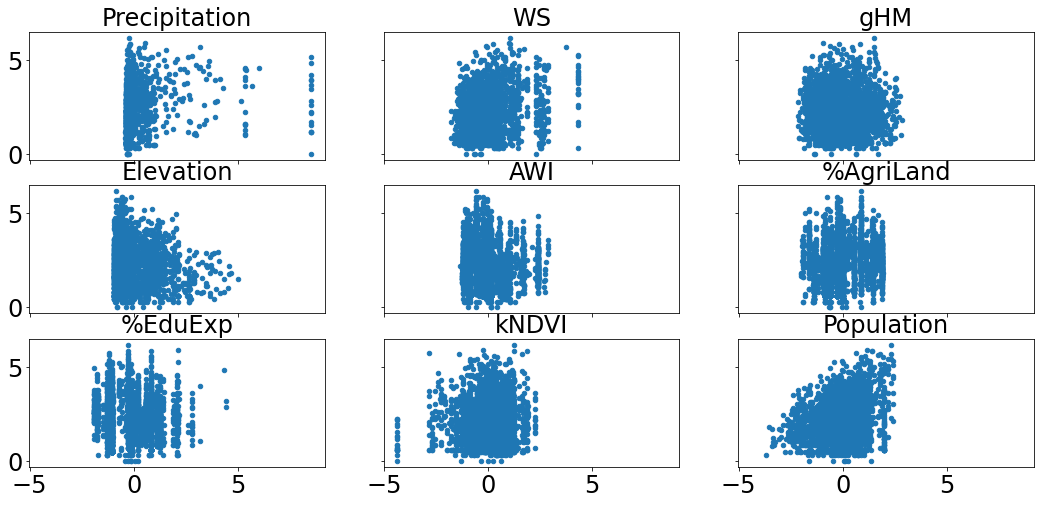

In [89]:
_, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(18,8))
r, c = 0, 0
for i in range(X_n.shape[1]):
    r, c = int(i/3), int(i%3)
    ax[r][c].scatter(X_n[:,i], Y_db, s=20)
    ax[r][c].set_title(features[i])

In [90]:
binning = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
Y_bin = binning.fit_transform(np.array(Y_db.tolist()).reshape(-1, 1)).flatten()

## Bootstrap to evaluate a RF model

In [105]:
c = np.zeros(X_n.shape[1])
r = []
rtr = []
mtr = []
restr = []
m = []
fi = np.zeros(X_n.shape[1])
res = []
rb = 0
m0 = []
ovr = []
ov = 100
idb = 0
allytest = []
allpred = []
shp_mat = []
shp_data = []


for b in range(1000):
    print("Boostr num. ", b)
    indices = np.arange(X_n.shape[0])
    X_tr, X_te, Y_tr, Y_te, idxtr, idxte = train_test_split(X_n, Y_db, indices, test_size=0.3, random_state=b, stratify=Y_bin)
    #m2 = GradientBoostingRegressor(loss='huber', learning_rate=0.1, n_estimators=22, min_samples_split=18, min_samples_leaf=14, max_depth=9, random_state=2, max_features=10)
    #m1 = RandomForestRegressor(max_depth=9, n_estimators=30, criterion="mse", min_samples_split=6, max_features=8, random_state=2)
    #m1 = RandomForestRegressor(max_depth=6, n_estimators=40, criterion="mse", min_samples_split=4, max_features=3, random_state=2)
    m1 = RandomForestRegressor(max_depth=6, n_estimators=40, criterion="mse", min_samples_split=4, max_features=3, random_state=2)
    m1.fit(X_tr, Y_tr)
    # print("R^2 = ", m1.score(X_te, Y_te))
    # print("Overfitting perc = ", 100*(1-m1.score(X_te, Y_te)/m1.score(X_tr, Y_tr)))
    ovr.append(100*(1-m1.score(X_te, Y_te)/m1.score(X_tr, Y_tr)))
    r.append(m1.score(X_te, Y_te))
    rtr.append(m1.score(X_tr, Y_tr))
    mse = 0
    mse0 = 0
    Y_pred = m1.predict(X_te)

    for i in range(len(Y_pred)):
        mse += (Y_pred[i] - list(Y_te)[i])**2
        res.append(Y_pred[i] - list(Y_te)[i])
        mse0 += (np.mean(list(Y_te))-list(Y_te)[i])**2
    # print("MSE = ", mse)
    # print("MSE base = ", mse0)
    m.append(mse/len(Y_pred))
    m0.append(mse0/len(Y_pred))

    Y_predtr = m1.predict(X_tr)
    msetr = 0
    for i in range(len(Y_predtr)):
        msetr += (Y_predtr[i]-list(Y_tr)[i])**2
        restr.append(Y_predtr[i]-list(Y_tr)[i])
    mtr.append(msetr/len(Y_predtr))
    allytest += list(Y_te)
    allpred += list(Y_pred)
    
    X_tedb = pd.DataFrame(X_te)
    X_tedb.columns = features
    config = {
    "model": m1,
    "X": X_tedb, 
    "features": features,
    "type": "regressor",
    "predictor": 'AWI',
    "Xtest": X_tedb, 
    "instance": 0,
    "plot": ["local", "waterfall"], 
    "path": "./agu_plots/shap_21.pdf"
    }
    sp = Shap(config)
    explainer, shapley, _, _ = sp.fit()
    shp_mat.append(shapley.values)
    shp_data.append(shapley.data)
    
#    if 100*(1-m1.score(X_te, Y_te)/m1.score(X_tr, Y_tr)) < ov and 100*(1-m1.score(X_te, Y_te)/m1.score(X_tr, Y_tr)) > 0:
#        Xtrb = X_tr
#        X_teb = X_te
#        Y_teb = Y_te
#        Y_trb = Y_tr
#        rb = m1.score(X_te, Y_te)
#        mb = m1
#        ov = 100*(1-m1.score(X_te, Y_te)/m1.score(X_tr, Y_tr))
#        idb = idxte
#        print("score = ", rb, "iteration = ", b)
        

Boostr num.  0
Instance number :  baseline
Precipitation  =  -0.26906742695846964
WS  =  -0.2310076912595433
gHM  =  -0.048436519513690934
Elevation  =  -0.38252237219629703
AWI  =  -0.09478271992866077
%AgriLand  =  -0.09642657086742283
%EduExp  =  -0.09392156762574662
kNDVI  =  0.17105578895629353
Population  =  0.07748609298544726
Boostr num.  1
Instance number :  baseline
Precipitation  =  -0.2639467975347519
WS  =  -0.2304841650608122
gHM  =  -0.08043203041901875
Elevation  =  -0.38776610258517646
AWI  =  -0.23411658358291826
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.19510586570867836
Population  =  0.07183017431580611
Boostr num.  2
Instance number :  baseline
Precipitation  =  -0.26444939746172585
WS  =  -0.21867465778044393
gHM  =  -0.11650149632657641
Elevation  =  -0.43241639466725884
AWI  =  -0.06901002886420819
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.14197678516669782
Population  =  0.0696229397974

Boostr num.  25
Instance number :  baseline
Precipitation  =  -0.26779221662303687
WS  =  -0.2519800275412395
gHM  =  -0.14520082850431387
Elevation  =  -0.4068887446778505
AWI  =  -0.23458588917165843
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.12255313516318818
Population  =  0.085949669572421
Boostr num.  26
Instance number :  baseline
Precipitation  =  -0.263313705135709
WS  =  -0.13087477010819956
gHM  =  -0.05391232494519288
Elevation  =  -0.4010002645554962
AWI  =  -0.07211163619144782
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.15190743816555216
Population  =  0.1400585267192518
Boostr num.  27
Instance number :  baseline
Precipitation  =  -0.2652734470564829
WS  =  -0.2045493909206093
gHM  =  -0.09931376373745553
Elevation  =  -0.4062320261689858
AWI  =  -0.07340463361942727
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.13573449441703167
Population  =  0.133231980563848
Boos

Boostr num.  50
Instance number :  baseline
Precipitation  =  -0.25996061870972687
WS  =  -0.13649850742324773
gHM  =  -0.11839169637400544
Elevation  =  -0.38252237219629703
AWI  =  -0.23431077899894862
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.07122979497239282
Population  =  0.1309248388663417
Boostr num.  51
Instance number :  baseline
Precipitation  =  -0.26831343868844565
WS  =  -0.217796774580162
gHM  =  -0.056533824076299866
Elevation  =  -0.3876402851333644
AWI  =  -0.2340680347289106
%AgriLand  =  -0.05306653070330008
%EduExp  =  -0.1408327989512777
kNDVI  =  0.04663643260479457
Population  =  0.0831791525406492
Boostr num.  52
Instance number :  baseline
Precipitation  =  -0.2739463581045497
WS  =  -0.24351171833102436
gHM  =  -0.1256396814938729
Elevation  =  -0.4326975304144361
AWI  =  -0.10377264874689847
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.10063398480398046
Population  =  0.1142659146798903


Boostr num.  75
Instance number :  baseline
Precipitation  =  -0.2651500198223939
WS  =  -0.16451714112476684
gHM  =  -0.1379334229474247
Elevation  =  -0.38017260192066266
AWI  =  -0.07548294850366445
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.10063398480398046
Population  =  0.08701246903907824
Boostr num.  76
Instance number :  baseline
Precipitation  =  -0.26313089005672
WS  =  -0.17872776954146374
gHM  =  -0.05721606760611255
Elevation  =  -0.38252237219629703
AWI  =  -0.08554135794340767
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.09392156762574662
kNDVI  =  0.07122979497239282
Population  =  0.07364062836922583
Boostr num.  77
Instance number :  baseline
Precipitation  =  -0.2720111324188068
WS  =  -0.1497159047396748
gHM  =  -0.21562550221025106
Elevation  =  -0.4010002645554962
AWI  =  -0.07406303108275439
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.04046717889050364
Population  =  0.0558017726629146

Exact explainer: 721it [00:10,  2.08it/s]                         


Boostr num.  90
Instance number :  baseline
Precipitation  =  -0.26534690320428345
WS  =  -0.2240692444353295
gHM  =  -0.10788976944639879
Elevation  =  -0.38252237219629703
AWI  =  -0.0801551907434191
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.06969730374446434
Population  =  0.03500734096589794
Boostr num.  91
Instance number :  baseline
Precipitation  =  -0.2609112260966179
WS  =  -0.19841879883352886
gHM  =  -0.08579479822259028
Elevation  =  -0.39414710937725195
AWI  =  -0.09089579514516383
%AgriLand  =  -0.12661893040631284
%EduExp  =  -0.09392156762574662
kNDVI  =  0.15190743816555216
Population  =  0.08061060862255787
Boostr num.  92
Instance number :  baseline
Precipitation  =  -0.267918840759478
WS  =  -0.15035310593076723
gHM  =  -0.01802634001274151
Elevation  =  -0.41793463814056664
AWI  =  -0.12374550839314497
%AgriLand  =  -0.05306653070330008
%EduExp  =  -0.1408327989512777
kNDVI  =  0.0514989322411461
Population  =  0.136188256302518

Boostr num.  115
Instance number :  baseline
Precipitation  =  -0.2679983031389426
WS  =  -0.21765432380984678
gHM  =  -0.12303124629425408
Elevation  =  -0.3653078642886406
AWI  =  -0.07343636361765996
%AgriLand  =  -0.12661893040631284
%EduExp  =  -0.09392156762574662
kNDVI  =  0.10063398480398046
Population  =  0.046727987911842364
Boostr num.  116
Instance number :  baseline
Precipitation  =  -0.26431075887973987
WS  =  -0.16451714112476684
gHM  =  -0.13330965982434437
Elevation  =  -0.38252237219629703
AWI  =  -0.0714294412294462
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.09433341563741159
Population  =  0.15406038796452268
Boostr num.  117
Instance number :  baseline
Precipitation  =  -0.2678102993863877
WS  =  -0.14683145610675097
gHM  =  -0.046032090625155876
Elevation  =  -0.38776610258517646
AWI  =  -0.07498320103150062
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.03573681161447964
Population  =  0.1361882

Boostr num.  140
Instance number :  baseline
Precipitation  =  -0.2598850724456845
WS  =  -0.154626548078393
gHM  =  -0.09938945958832336
Elevation  =  -0.38252237219629703
AWI  =  -0.08289983559054144
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.10063398480398046
Population  =  0.15166304809365871
Boostr num.  141
Instance number :  baseline
Precipitation  =  -0.2616951162414215
WS  =  -0.16120904541168346
gHM  =  -0.15510248778613833
Elevation  =  -0.3902313632461264
AWI  =  -0.09321208501614558
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.07122979497239282
Population  =  0.08703498654483213
Boostr num.  142
Instance number :  baseline
Precipitation  =  -0.2651842430843254
WS  =  -0.2457967292623409
gHM  =  -0.11650149632657641
Elevation  =  -0.38252237219629703
AWI  =  -0.0815909731634455
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.06736371625278523
Population  =  0.01419840104238

Exact explainer: 721it [43:34, 29.37s/it]                         


Boostr num.  165
Instance number :  baseline
Precipitation  =  -0.2716953632429741
WS  =  -0.14117563119158516
gHM  =  -0.039773243040232865
Elevation  =  -0.38252237219629703
AWI  =  -0.14351168001873085
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.07481868711172376
Population  =  0.14907519648617487
Boostr num.  166
Instance number :  baseline
Precipitation  =  -0.26924221453250485
WS  =  -0.17872776954146374
gHM  =  -0.1164079398900914
Elevation  =  -0.4091682677858281
AWI  =  -0.07931434579025431
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.15190743816555216
Population  =  0.08170011369686676
Boostr num.  167
Instance number :  baseline
Precipitation  =  -0.2675418620336819
WS  =  -0.19366977594955423
gHM  =  -0.20831842870227033
Elevation  =  -0.38252237219629703
AWI  =  -0.07634759095550361
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.07481868711172376
Population  =  0.1172089652

Exact explainer: 721it [00:11,  5.25it/s]                         


Boostr num.  189
Instance number :  baseline
Precipitation  =  -0.26313089005672
WS  =  -0.21639738074604456
gHM  =  -0.1032964239458698
Elevation  =  -0.38252237219629703
AWI  =  -0.07211163619144782
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.03715118142090089
Population  =  0.08170011369686676


Exact explainer: 721it [00:12, 11.22it/s]                         


Boostr num.  190
Instance number :  baseline
Precipitation  =  -0.26747305693267787
WS  =  -0.233648556545054
gHM  =  -0.11650149632657641
Elevation  =  -0.3924062719000949
AWI  =  -0.07931434579025431
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.07481868711172376
Population  =  0.12780580322455698


Exact explainer: 721it [00:11,  8.49it/s]                         


Boostr num.  191
Instance number :  baseline
Precipitation  =  -0.26396048506386394
WS  =  -0.2457967292623409
gHM  =  -0.17893093608169072
Elevation  =  -0.3858464335812428
AWI  =  -0.114799230108516
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.10063398480398046
Population  =  0.08155839930780645


Exact explainer: 721it [00:10,  2.57it/s]                         


Boostr num.  192
Instance number :  baseline
Precipitation  =  -0.26786005050335465
WS  =  -0.2457967292623409
gHM  =  -0.13740102763655776
Elevation  =  -0.4322830630626323
AWI  =  -0.06908142136023174
%AgriLand  =  -0.11113043293235852
%EduExp  =  -0.09392156762574662
kNDVI  =  0.10063398480398046
Population  =  0.0867979345367448


Exact explainer: 721it [00:11,  8.51it/s]                         


Boostr num.  193
Instance number :  baseline
Precipitation  =  -0.267918840759478
WS  =  -0.16630230367898702
gHM  =  -0.12624422785010658
Elevation  =  -0.416539655708843
AWI  =  -0.07118353374314329
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.10063398480398046
Population  =  0.07559292304569448


Exact explainer: 721it [00:10,  4.20it/s]                         


Boostr num.  194
Instance number :  baseline
Precipitation  =  -0.2620117891468482
WS  =  -0.19627994840333698
gHM  =  -0.1385161322461202
Elevation  =  -0.39414710937725195
AWI  =  -0.0739599085884983
%AgriLand  =  -0.11113043293235852
%EduExp  =  -0.1408327989512777
kNDVI  =  0.1598827712475684
Population  =  0.013495764753953665


Exact explainer: 721it [00:11,  6.52it/s]                         


Boostr num.  195
Instance number :  baseline
Precipitation  =  -0.2619068877386339
WS  =  -0.16487715663749208
gHM  =  -0.061438361818886414
Elevation  =  -0.40028204193659056
AWI  =  -0.08922658673493851
%AgriLand  =  -0.07474655078536145
%EduExp  =  -0.1408327989512777
kNDVI  =  0.08142576679128324
Population  =  0.07019228767162197


Exact explainer: 721it [00:10,  4.18it/s]                         


Boostr num.  196
Instance number :  baseline
Precipitation  =  -0.266444832230865
WS  =  -0.20229039278266425
gHM  =  -0.1651692312566957
Elevation  =  -0.3905293945435985
AWI  =  -0.08201932813958593
%AgriLand  =  -0.05306653070330008
%EduExp  =  -0.09392156762574662
kNDVI  =  0.11159355998358432
Population  =  0.010485142693836375


Exact explainer: 721it [00:10,  2.62it/s]                         


Boostr num.  197
Instance number :  baseline
Precipitation  =  -0.2668124367271556
WS  =  -0.23312503034632293
gHM  =  -0.17893093608169072
Elevation  =  -0.37334773533749166
AWI  =  -0.12671543878560443
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.06481990590265832
Population  =  0.0741787214985849
Boostr num.  198
Instance number :  baseline
Precipitation  =  -0.26655448439371776
WS  =  -0.16720560478703622
gHM  =  -0.17783401353667377
Elevation  =  -0.40100026455549637
AWI  =  -0.12289230013885037
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.04532967852685518
Population  =  0.06855440102743783
Boostr num.  199
Instance number :  baseline
Precipitation  =  -0.26352405245874005
WS  =  -0.18824041172229042
gHM  =  -0.054671730193540054
Elevation  =  -0.44803113282000157
AWI  =  -0.07211163619144782
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.03715118142090089
Population  =  0.0865785

Exact explainer: 721it [00:11,  6.49it/s]                         


Boostr num.  200
Instance number :  baseline
Precipitation  =  -0.2713872911867504
WS  =  -0.20631510953187301
gHM  =  -0.03370285274660034
Elevation  =  -0.39876232786196686
AWI  =  -0.09383875248124003
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.0662304043678601
Population  =  0.07150835954222212


Exact explainer: 721it [00:10,  2.77it/s]                         


Boostr num.  201
Instance number :  baseline
Precipitation  =  -0.26737514336894097
WS  =  -0.14962641584440645
gHM  =  -0.10096743939857747
Elevation  =  -0.38689738067028234
AWI  =  -0.11342532646798248
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.06764090283306186
Population  =  0.12725636204533566
Boostr num.  202
Instance number :  baseline
Precipitation  =  -0.2690773030625079
WS  =  -0.1495002664255537
gHM  =  -0.1661655207947067
Elevation  =  -0.382840505173046
AWI  =  -0.08077392570895522
%AgriLand  =  -0.09642657086742283
%EduExp  =  -0.1408327989512777
kNDVI  =  0.11159355998358432
Population  =  0.07559292304569448
Boostr num.  203
Instance number :  baseline
Precipitation  =  -0.26921919191636684
WS  =  -0.22508957840592664
gHM  =  -0.09476288009568021
Elevation  =  -0.39247734596545925
AWI  =  -0.07219096118702925
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.03715118142090089
Population  =  0.070964466116

Exact explainer: 721it [00:11,  4.02it/s]                         


Boostr num.  204
Instance number :  baseline
Precipitation  =  -0.26534690320428345
WS  =  -0.19000817319387034
gHM  =  -0.11650149632657641
Elevation  =  -0.42330717846526655
AWI  =  -0.06908142136023174
%AgriLand  =  -0.11679908560930244
%EduExp  =  -0.1408327989512777
kNDVI  =  0.08803284647084271
Population  =  0.13849539800002503
Boostr num.  205
Instance number :  baseline
Precipitation  =  -0.2672833156415235
WS  =  -0.17706795080997664
gHM  =  -0.1746731293299773
Elevation  =  -0.38252237219629703
AWI  =  -0.07211163619144782
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.09392156762574662
kNDVI  =  0.06736371625278523
Population  =  0.07545108242264555
Boostr num.  206
Instance number :  baseline
Precipitation  =  -0.26465285623534807
WS  =  -0.18824041172229042
gHM  =  -0.16841969332112683
Elevation  =  -0.4007392395322083
AWI  =  -0.0695097763363723
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.09392156762574662
kNDVI  =  0.04046717889050364
Population  =  0.033365693

Boostr num.  229
Instance number :  baseline
Precipitation  =  -0.2646492890390361
WS  =  -0.19366977594955423
gHM  =  -0.04639956099082561
Elevation  =  -0.39678307536996454
AWI  =  -0.13977628383270557
%AgriLand  =  -0.07474655078536145
%EduExp  =  -0.1408327989512777
kNDVI  =  0.10063398480398046
Population  =  0.1083625861677375
Boostr num.  230
Instance number :  baseline
Precipitation  =  -0.2662930805897693
WS  =  -0.2248401667375458
gHM  =  0.01681637038223468
Elevation  =  -0.38776610258517646
AWI  =  -0.07789442836934427
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.10063398480398046
Population  =  0.1446215461655416
Boostr num.  231
Instance number :  baseline
Precipitation  =  -0.27119189389323217
WS  =  -0.18431399999762063
gHM  =  -0.16199081191530243
Elevation  =  -0.41793463814056664
AWI  =  -0.07460244105270908
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.12255313516318818
Population  =  0.068554401027

Exact explainer: 721it [08:12,  1.10s/it]                         


Boostr num.  241
Instance number :  baseline
Precipitation  =  -0.2668660418140837
WS  =  -0.13729239899239085
gHM  =  -0.13391703168142138
Elevation  =  -0.4010002645554962
AWI  =  -0.08247148061440088
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.10063398480398046
Population  =  0.04183388584929432
Boostr num.  242
Instance number :  baseline
Precipitation  =  -0.26396048506386394
WS  =  -0.16451714112476684
gHM  =  -0.11650149632657641
Elevation  =  -0.38252237219629703
AWI  =  -0.23450497441497897
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.10063398480398046
Population  =  0.08315663503489532
Boostr num.  243
Instance number :  baseline
Precipitation  =  -0.2664284817455985
WS  =  -0.17706795080997664
gHM  =  -0.061438361818886414
Elevation  =  -0.37691704752622734
AWI  =  -0.23776583910915644
%AgriLand  =  -0.11113043293235852
%EduExp  =  -0.09392156762574662
kNDVI  =  0.15190743816555216
Population  =  0.11596803

Boostr num.  266
Instance number :  baseline
Precipitation  =  -0.25662311525203174
WS  =  -0.22622403902583282
gHM  =  -0.20832148601042777
Elevation  =  -0.38252237219629703
AWI  =  -0.07838624334194993
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.022165956989814127
Population  =  0.1212184434448261
Boostr num.  267
Instance number :  baseline
Precipitation  =  -0.2619068877386339
WS  =  -0.15748331555988182
gHM  =  -0.09931376373745553
Elevation  =  -0.3922159208498104
AWI  =  -0.11651841580627358
%AgriLand  =  -0.05306653070330008
%EduExp  =  -0.09392156762574662
kNDVI  =  0.12255313516318818
Population  =  0.09189374787326994
Boostr num.  268
Instance number :  baseline
Precipitation  =  -0.25966859733000136
WS  =  -0.14117563119158516
gHM  =  -0.14745613732176477
Elevation  =  -0.42066537374581914
AWI  =  -0.07138977873165547
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.06481990590265832
Population  =  0.07545108

Boostr num.  291
Instance number :  baseline
Precipitation  =  -0.26313089005672
WS  =  -0.1766044405393259
gHM  =  -0.054750953051553954
Elevation  =  -0.37568749834303566
AWI  =  -0.07838624334194993
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.11737718328851215
kNDVI  =  0.07328619588379529
Population  =  0.037842734327548144
Boostr num.  292
Instance number :  baseline
Precipitation  =  -0.263313705135709
WS  =  -0.1540788357825689
gHM  =  -0.17006389560507326
Elevation  =  -0.382840505173046
AWI  =  -0.11445044024044024
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.09392156762574662
kNDVI  =  0.06764090283306186
Population  =  0.08170011369686676
Boostr num.  293
Instance number :  baseline
Precipitation  =  -0.26165245733099196
WS  =  -0.17706795080997664
gHM  =  -0.20831842870227033
Elevation  =  -0.38252237219629703
AWI  =  -0.19005520486949012
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.1796584342198194
Population  =  0.1384953980000

Boostr num.  316
Instance number :  baseline
Precipitation  =  -0.2676620319059191
WS  =  -0.18431399999762063
gHM  =  -0.08622384419718154
Elevation  =  -0.4167728406246137
AWI  =  -0.07340463361942727
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.03920591927791596
Population  =  0.038760698932685085
Boostr num.  317
Instance number :  baseline
Precipitation  =  -0.2673290392750568
WS  =  -0.17235204440579463
gHM  =  -0.14745613732176477
Elevation  =  -0.4010002645554962
AWI  =  -0.07382505609600952
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.06764090283306186
Population  =  0.07331881359564184
Boostr num.  318
Instance number :  baseline
Precipitation  =  -0.2598373384323459
WS  =  -0.11988697181121463
gHM  =  -0.13965689650535656
Elevation  =  -0.458853559285132
AWI  =  -0.07184986370602858
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.11737718328851215
kNDVI  =  0.052805686319085485
Population  =  0.07495953182

Boostr num.  341
Instance number :  baseline
Precipitation  =  -0.26773083700692313
WS  =  -0.26029727102003863
gHM  =  -0.11650149632657641
Elevation  =  -0.38252237219629703
AWI  =  -0.1259971056900091
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.11159355998358432
Population  =  0.1083625861677375
Boostr num.  342
Instance number :  baseline
Precipitation  =  -0.2695229888823071
WS  =  -0.1649684693563614
gHM  =  -0.14221123831417395
Elevation  =  -0.4195035762298662
AWI  =  -0.08388346553575303
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.013063678951643913
Population  =  0.12363356509526593
Boostr num.  343
Instance number :  baseline
Precipitation  =  -0.26619386021646696
WS  =  -0.2204187083692684
gHM  =  -0.17783401353667377
Elevation  =  -0.38252237219629703
AWI  =  -0.17169940089191446
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.1474117461306434
Population  =  0.085730273214

Boostr num.  366
Instance number :  baseline
Precipitation  =  -0.2697801409118116
WS  =  -0.1974321893307498
gHM  =  -0.12571013883047327
Elevation  =  -0.3839267645773091
AWI  =  -0.14743114590632722
%AgriLand  =  -0.05306653070330008
%EduExp  =  -0.1408327989512777
kNDVI  =  0.09433341563741159
Population  =  0.03783095513772886
Boostr num.  367
Instance number :  baseline
Precipitation  =  -0.2615345868145219
WS  =  -0.09978620796783243
gHM  =  -0.11650149632657641
Elevation  =  -0.4167728406246137
AWI  =  -0.06887517637171969
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.06764090283306186
Population  =  0.06195762162531079
Boostr num.  368
Instance number :  baseline
Precipitation  =  -0.26445643544492436
WS  =  -0.1984322242301717
gHM  =  -0.09938945958832336
Elevation  =  -0.3839267645773091
AWI  =  -0.23452115736631485
%AgriLand  =  -0.11113043293235852
%EduExp  =  -0.09392156762574662
kNDVI  =  0.08752268480741976
Population  =  0.0557732698491

Boostr num.  391
Instance number :  baseline
Precipitation  =  -0.2615893746570342
WS  =  -0.16389750907395284
gHM  =  -0.10164274828474786
Elevation  =  -0.382522372196297
AWI  =  -0.09787301125332985
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.19795626078039524
Population  =  0.08245089187163493
Boostr num.  392
Instance number :  baseline
Precipitation  =  -0.27048257916501167
WS  =  -0.22508957840592664
gHM  =  -0.11650149632657641
Elevation  =  -0.38315863814979495
AWI  =  -0.07379332609777683
%AgriLand  =  -0.11113043293235852
%EduExp  =  -0.09392156762574662
kNDVI  =  0.0588127961108719
Population  =  0.07545108242264555
Boostr num.  393
Instance number :  baseline
Precipitation  =  -0.2609634673877199
WS  =  -0.18265418126613353
gHM  =  -0.11650149632657641
Elevation  =  -0.42031029509110607
AWI  =  -0.16636847922235468
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.06481990590265832
Population  =  0.0972862611

Boostr num.  416
Instance number :  baseline
Precipitation  =  -0.2638491164011717
WS  =  -0.2184252461120631
gHM  =  -0.06372140043036599
Elevation  =  -0.40100026455549637
AWI  =  -0.12936780786972207
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.11737718328851215
kNDVI  =  0.06969730374446434
Population  =  0.0972862611115307
Boostr num.  417
Instance number :  baseline
Precipitation  =  -0.2677298657862368
WS  =  -0.20229039278266425
gHM  =  -0.09416381132460208
Elevation  =  -0.3963584266441615
AWI  =  -0.07211163619144782
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.09392156762574662
kNDVI  =  0.09433341563741159
Population  =  0.13024701561896074
Boostr num.  418
Instance number :  baseline
Precipitation  =  -0.25986039336163286
WS  =  -0.20212757027998995
gHM  =  -0.023633723611494302
Elevation  =  -0.38252237219629703
AWI  =  -0.2340680347289106
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.1551677698396929
Population  =  0.15795511365

Boostr num.  441
Instance number :  baseline
Precipitation  =  -0.26979728697502126
WS  =  -0.2384368598821976
gHM  =  -0.14948115110090254
Elevation  =  -0.4159699125585764
AWI  =  -0.0726431136618442
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.06595321778758345
Population  =  0.13143297980268942
Boostr num.  442
Instance number :  baseline
Precipitation  =  -0.2617491216303031
WS  =  -0.19795420332050595
gHM  =  -0.1264360087817754
Elevation  =  -0.38252237219629703
AWI  =  -0.2340680347289106
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.0601085187461628
Population  =  0.024087048090544728
Boostr num.  443
Instance number :  baseline
Precipitation  =  -0.2662640006768442
WS  =  -0.2100238809783341
gHM  =  -0.18558997296948532
Elevation  =  -0.4031504560744287
AWI  =  -0.0705727312771652
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.09392156762574662
kNDVI  =  0.22434476341488935
Population  =  0.14996222457103

Boostr num.  466
Instance number :  baseline
Precipitation  =  -0.2663912271439369
WS  =  -0.23263895965131554
gHM  =  -0.16199081191530243
Elevation  =  -0.39441047522230066
AWI  =  -0.07343636361765996
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.15190743816555216
Population  =  0.08803791386908702
Boostr num.  467
Instance number :  baseline
Precipitation  =  -0.2662590968822376
WS  =  -0.2134362202612335
gHM  =  -0.20444768949842615
Elevation  =  -0.40142322487195314
AWI  =  -0.0772043009077846
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.10063398480398046
Population  =  0.07183017431580611
Boostr num.  468
Instance number :  baseline
Precipitation  =  -0.26144552530400333
WS  =  -0.20599916422912534
gHM  =  -0.11839169637400544
Elevation  =  -0.38252237219629703
AWI  =  -0.23448879146364307
%AgriLand  =  -0.12661893040631284
%EduExp  =  -0.1408327989512777
kNDVI  =  0.10063398480398046
Population  =  0.0832016700

Boostr num.  491
Instance number :  baseline
Precipitation  =  -0.26572914915973916
WS  =  -0.20631510953187301
gHM  =  -0.07911842886392394
Elevation  =  -0.38549853020771707
AWI  =  -0.06898623136553354
%AgriLand  =  -0.12661893040631284
%EduExp  =  -0.09392156762574662
kNDVI  =  0.013063678951643913
Population  =  0.1291437462122249
Boostr num.  492
Instance number :  baseline
Precipitation  =  -0.2695173000856277
WS  =  -0.17325534551384386
gHM  =  -0.11650149632657641
Elevation  =  -0.4439721771870928
AWI  =  -0.07683940592810927
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.15190743816555216
Population  =  0.07748609298544726
Boostr num.  493
Instance number :  baseline
Precipitation  =  -0.27056725945569315
WS  =  -0.16668621394157335
gHM  =  0.03479901184944628
Elevation  =  -0.382522372196297
AWI  =  -0.23456970622032253
%AgriLand  =  -0.05306653070330008
%EduExp  =  -0.1408327989512777
kNDVI  =  0.10063398480398046
Population  =  0.15352209561

Boostr num.  516
Instance number :  baseline
Precipitation  =  -0.2627680809052422
WS  =  -0.11412709666592245
gHM  =  -0.018683091577654437
Elevation  =  -0.38252237219629703
AWI  =  -0.07382505609600952
%AgriLand  =  -0.05306653070330008
%EduExp  =  -0.1408327989512777
kNDVI  =  0.03880918015570227
Population  =  0.0731490777719023
Boostr num.  517
Instance number :  baseline
Precipitation  =  -0.26178786166779505
WS  =  -0.19050966667018127
gHM  =  -0.059155323207406844
Elevation  =  -0.38252237219629703
AWI  =  -0.10608379538428475
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.04663643260479457
Population  =  0.1206355517856879
Boostr num.  518
Instance number :  baseline
Precipitation  =  -0.2653126799423519
WS  =  -0.14937411700670095
gHM  =  -0.10790763003201598
Elevation  =  -0.3945885209974742
AWI  =  -0.11817622872006897
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.0601085187461628
Population  =  0.04855692415

Boostr num.  541
Instance number :  baseline
Precipitation  =  -0.2620432892322905
WS  =  -0.15090081822659132
gHM  =  -0.1102366145793083
Elevation  =  -0.44803113282000157
AWI  =  -0.07053306877937447
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.15751472947212097
Population  =  0.08061060862255787
Boostr num.  542
Instance number :  baseline
Precipitation  =  -0.2551339763274139
WS  =  -0.17872776954146374
gHM  =  -0.1421244937634173
Elevation  =  -0.4037894903669621
AWI  =  -0.23455352326898665
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.04046717889050364
Population  =  0.07126082644161036
Boostr num.  543
Instance number :  baseline
Precipitation  =  -0.26624984837436627
WS  =  -0.2525410202128565
gHM  =  -0.08190164932443114
Elevation  =  -0.44803113282000157
AWI  =  -0.06977948132134958
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.10063398480398046
Population  =  0.100114496692

Boostr num.  566
Instance number :  baseline
Precipitation  =  -0.2593948301786635
WS  =  -0.1089123132132224
gHM  =  -0.027820208490829536
Elevation  =  -0.3833206154418384
AWI  =  -0.07752953338966895
%AgriLand  =  -0.11113043293235852
%EduExp  =  -0.09392156762574662
kNDVI  =  0.0588127961108719
Population  =  0.0741787214985849
Boostr num.  567
Instance number :  baseline
Precipitation  =  -0.2618845259671062
WS  =  -0.14962641584440645
gHM  =  -0.12296078895765368
Elevation  =  -0.43533840102382004
AWI  =  -0.07531636601294313
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.03573681161447964
Population  =  0.11990643840027186
Boostr num.  568
Instance number :  baseline
Precipitation  =  -0.2619929731475201
WS  =  -0.16487715663749208
gHM  =  -0.11650149632657641
Elevation  =  -0.4114457608687697
AWI  =  -0.07414235607833597
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.06481990590265832
Population  =  0.07871743868

Boostr num.  591
Instance number :  baseline
Precipitation  =  -0.2717744372264777
WS  =  -0.19456063028103632
gHM  =  -0.0702903290834691
Elevation  =  -0.38252237219629703
AWI  =  -0.07053306877937447
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.07481868711172376
Population  =  0.09526934647003063
Boostr num.  592
Instance number :  baseline
Precipitation  =  -0.26352405245874005
WS  =  -0.21523288486425912
gHM  =  -0.07817285929166702
Elevation  =  -0.3839267645773091
AWI  =  -0.0705727312771652
%AgriLand  =  -0.05306653070330008
%EduExp  =  -0.1408327989512777
kNDVI  =  0.05410140895437639
Population  =  0.046727987911842364
Boostr num.  593
Instance number :  baseline
Precipitation  =  -0.26954013494551676
WS  =  -0.1662109909601177
gHM  =  -0.11650149632657641
Elevation  =  -0.38252237219629703
AWI  =  -0.0801551907434191
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.10063398480398046
Population  =  0.03495562477

Boostr num.  616
Instance number :  baseline
Precipitation  =  -0.26313089005672
WS  =  -0.20832791051883942
gHM  =  -0.047573599379437226
Elevation  =  -0.38252237219629703
AWI  =  -0.23410040063158238
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.036443996517690265
Population  =  0.153137964716456
Boostr num.  617
Instance number :  baseline
Precipitation  =  -0.2618102234393227
WS  =  -0.13780713223794538
gHM  =  -0.10096743939857747
Elevation  =  -0.4286491758187285
AWI  =  -0.07379332609777683
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.12255313516318818
Population  =  0.07183017431580611
Boostr num.  618
Instance number :  baseline
Precipitation  =  -0.27088847919905934
WS  =  -0.17101821008316903
gHM  =  -0.1378598400272962
Elevation  =  -0.3905226615726189
AWI  =  -0.07406303108275439
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.04046717889050364
Population  =  0.1436359634706

Exact explainer: 721it [00:10,  5.65it/s]                          


Boostr num.  637
Instance number :  baseline
Precipitation  =  -0.26737514336894097
WS  =  -0.18824041172229042
gHM  =  -0.13932225815989735
Elevation  =  -0.42483131183044737
AWI  =  -0.08079772320762975
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.15662243957344665
Population  =  0.11294492259922118


Exact explainer: 721it [00:10,  5.58it/s]                         


Boostr num.  638
Instance number :  baseline
Precipitation  =  -0.2627506123294554
WS  =  -0.1495002664255537
gHM  =  -0.0795474748385152
Elevation  =  -0.39022463027514687
AWI  =  -0.06984294131781481
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.06969730374446434
Population  =  0.09854937191089766
Boostr num.  639
Instance number :  baseline
Precipitation  =  -0.26530767031841446
WS  =  -0.2361778334089073
gHM  =  -0.17732813433059305
Elevation  =  -0.4135831279612372
AWI  =  -0.1058406243127318
%AgriLand  =  -0.05306653070330008
%EduExp  =  -0.1408327989512777
kNDVI  =  0.09433341563741159
Population  =  0.06752577980740582
Boostr num.  640
Instance number :  baseline
Precipitation  =  -0.25986039336163286
WS  =  -0.15835227793019463
gHM  =  -0.11650149632657641
Elevation  =  -0.40073923953220836
AWI  =  -0.23413276653425416
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.06736371625278523
Population  =  0.0423812918194

Boostr num.  663
Instance number :  baseline
Precipitation  =  -0.2649247946683726
WS  =  -0.2310076912595433
gHM  =  -0.19660738104337622
Elevation  =  -0.4062320261689858
AWI  =  -0.08247148061440088
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.06481990590265832
Population  =  0.018791406422249197
Boostr num.  664
Instance number :  baseline
Precipitation  =  -0.2679983031389426
WS  =  -0.23751466197847215
gHM  =  -0.17006389560507326
Elevation  =  -0.38252237219629703
AWI  =  -0.06908142136023174
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.0514989322411461
Population  =  0.13849539800002503
Boostr num.  665
Instance number :  baseline
Precipitation  =  -0.2669798679411773
WS  =  -0.13087477010819956
gHM  =  -0.13399061460154987
Elevation  =  -0.38252237219629703
AWI  =  -0.12397271919071931
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.11159355998358432
Population  =  0.123246883819

Exact explainer: 721it [00:13, 15.54it/s]                         


Boostr num.  678
Instance number :  baseline
Precipitation  =  -0.258529739423956
WS  =  -0.13036003686264502
gHM  =  -0.009856780654822964
Elevation  =  -0.39804176442130035
AWI  =  -0.07618100846478229
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.15190743816555216
Population  =  0.08883311879000297
Boostr num.  679
Instance number :  baseline
Precipitation  =  -0.26530767031841446
WS  =  -0.2435727171892834
gHM  =  -0.1264360087817754
Elevation  =  -0.382840505173046
AWI  =  -0.08554135794340767
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.12975548786944052
Population  =  0.08061060862255787
Boostr num.  680
Instance number :  baseline
Precipitation  =  -0.2640991236458499
WS  =  -0.17706795080997664
gHM  =  -0.13391703168142138
Elevation  =  -0.37325748511642354
AWI  =  -0.07414235607833597
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.09392156762574662
kNDVI  =  0.10063398480398046
Population  =  0.097505888938

Boostr num.  703
Instance number :  baseline
Precipitation  =  -0.2625588185656169
WS  =  -0.17491516424533093
gHM  =  -0.05459456847500557
Elevation  =  -0.40754330358031854
AWI  =  -0.17736608885732258
%AgriLand  =  -0.07474655078536145
%EduExp  =  -0.09392156762574662
kNDVI  =  0.1363357709825876
Population  =  0.005851418950628769
Boostr num.  704
Instance number :  baseline
Precipitation  =  -0.26143793571454843
WS  =  -0.3109528736730205
gHM  =  -0.18449305042446837
Elevation  =  -0.38776610258517646
AWI  =  -0.08678676037403837
%AgriLand  =  -0.05306653070330008
%EduExp  =  -0.1408327989512777
kNDVI  =  0.07481868711172139
Population  =  0.08170011369686676
Boostr num.  705
Instance number :  baseline
Precipitation  =  -0.26201533491904777
WS  =  -0.217796774580162
gHM  =  -0.09931376373745553
Elevation  =  -0.4055839195401465
AWI  =  -0.09787301125332985
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.08803284647084271
Population  =  0.0570133272

Exact explainer: 721it [00:10,  2.51s/it]                 


Boostr num.  722
Instance number :  baseline
Precipitation  =  -0.2679866746397958
WS  =  -0.20456281631725215
gHM  =  -0.11650149632657641
Elevation  =  -0.3825223721962969
AWI  =  -0.12311951093642472
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.1551677698396834
Population  =  0.0359009140548872
Boostr num.  723
Instance number :  baseline
Precipitation  =  -0.26465285623534807
WS  =  -0.23316248585004662
gHM  =  -0.05391232494519288
Elevation  =  -0.4007050022530474
AWI  =  -0.23444024260963547
%AgriLand  =  -0.11679908560930244
%EduExp  =  -0.09392156762574662
kNDVI  =  0.052805686319085485
Population  =  0.08510140460809722
Boostr num.  724
Instance number :  baseline
Precipitation  =  -0.2675418620336819
WS  =  -0.17706795080997664
gHM  =  -0.07805540361883338
Elevation  =  -0.42066537374581914
AWI  =  -0.06908142136023174
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.04046717889050364
Population  =  0.01803102197

Boostr num.  747
Instance number :  baseline
Precipitation  =  -0.26932279061418596
WS  =  -0.283142304228988
gHM  =  -0.21562550221025106
Elevation  =  -0.38252237219629703
AWI  =  -0.07406303108275439
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.11159355998358432
Population  =  0.0361506130618147
Boostr num.  748
Instance number :  baseline
Precipitation  =  -0.2640991236458499
WS  =  -0.19177593466545026
gHM  =  -0.14819912617510683
Elevation  =  -0.3870231981220944
AWI  =  -0.0739599085884983
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.12255313516318818
Population  =  0.04508758283761764
Boostr num.  749
Instance number :  baseline
Precipitation  =  -0.27016135942164554
WS  =  -0.19366977594955423
gHM  =  -0.12571013883047327
Elevation  =  -0.3922159208498104
AWI  =  -0.07184986370602858
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.12555303495075842
Population  =  0.08315663503489

Boostr num.  772
Instance number :  baseline
Precipitation  =  -0.2618845259671062
WS  =  -0.1934083893536235
gHM  =  -0.11650149632657641
Elevation  =  -0.42066537374581914
AWI  =  -0.0695097763363723
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.04046717889050364
Population  =  0.09996626191608896
Boostr num.  773
Instance number :  baseline
Precipitation  =  -0.2651842430843254
WS  =  -0.24573573040408186
gHM  =  -0.20507648214108964
Elevation  =  -0.38354270136355206
AWI  =  -0.11923926315472146
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.12255313516318818
Population  =  0.08315663503489532
Boostr num.  774
Instance number :  baseline
Precipitation  =  -0.26906742695846964
WS  =  -0.23263895965131554
gHM  =  -0.13119947387017927
Elevation  =  -0.42066537374581914
AWI  =  -0.09540600389074297
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.07481868711172376
Population  =  0.11510918292

Exact explainer: 721it [00:11,  9.73it/s]                         


Boostr num.  787
Instance number :  baseline
Precipitation  =  -0.26659474963180824
WS  =  -0.2304841650608122
gHM  =  -0.10781407359553095
Elevation  =  -0.4276527132298408
AWI  =  -0.06939872134255803
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.12255313516318818
Population  =  0.16153542363369555
Boostr num.  788
Instance number :  baseline
Precipitation  =  -0.2649247946683726
WS  =  -0.14980539363494316
gHM  =  -0.14104801657237284
Elevation  =  -0.3922159208498104
AWI  =  -0.15422853560042926
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.04663643260479457
Population  =  0.013495764753953665
Boostr num.  789
Instance number :  baseline
Precipitation  =  -0.26303619111710314
WS  =  -0.2304841650608122
gHM  =  -0.18337066783405226
Elevation  =  -0.38252237219629703
AWI  =  -0.13527528860665738
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.12255313516318818
Population  =  0.00648761

Exact explainer: 721it [00:10,  2.51s/it]                 


Boostr num.  804
Instance number :  baseline
Precipitation  =  -0.26286277984485906
WS  =  -0.16487715663749208
gHM  =  -0.21562550221025106
Elevation  =  -0.3715651807607393
AWI  =  -0.12671543878560443
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.12615431151631434
Population  =  0.08170011369686676
Boostr num.  805
Instance number :  baseline
Precipitation  =  -0.2627506123294554
WS  =  -0.2413487051162259
gHM  =  -0.12296078895765368
Elevation  =  -0.38898624856013686
AWI  =  -0.09336280250775071
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.10063398480398046
Population  =  0.07183017431580611
Boostr num.  806
Instance number :  baseline
Precipitation  =  -0.2564537225506518
WS  =  -0.1662109909601177
gHM  =  -0.13206938407821028
Elevation  =  -0.38252237219629703
AWI  =  -0.07256378866626276
%AgriLand  =  -0.11113043293235852
%EduExp  =  -0.1408327989512777
kNDVI  =  0.11159355998358432
Population  =  0.04907873435

Boostr num.  829
Instance number :  baseline
Precipitation  =  -0.267401077524396
WS  =  -0.16120904541168346
gHM  =  -0.11650149632657641
Elevation  =  -0.39944631320171164
AWI  =  -0.08869056026799604
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.10043033365354812
Population  =  0.034560681836781224
Boostr num.  830
Instance number :  baseline
Precipitation  =  -0.2613846214069652
WS  =  -0.15035310593076723
gHM  =  -0.14819912617510683
Elevation  =  -0.3839267645773091
AWI  =  -0.07035855378909497
%AgriLand  =  -0.11113043293235852
%EduExp  =  -0.09392156762574662
kNDVI  =  0.08803284647084271
Population  =  0.013495764753953665
Boostr num.  831
Instance number :  baseline
Precipitation  =  -0.27077405757237993
WS  =  -0.17832218512453785
gHM  =  -0.11650149632657641
Elevation  =  -0.38252237219629703
AWI  =  -0.07343636361765996
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.12255313516318818
Population  =  0.0804688

Exact explainer: 721it [00:10,  6.37it/s]                         


Boostr num.  848
Instance number :  baseline
Precipitation  =  -0.26897370436468876
WS  =  -0.20181237187299852
gHM  =  -0.1702531176155856
Elevation  =  -0.43241639466725884
AWI  =  -0.06901002886420819
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.11159355998358432
Population  =  0.08155839930780645
Boostr num.  849
Instance number :  baseline
Precipitation  =  -0.2637920430278208
WS  =  -0.19177593466545026
gHM  =  -0.11650149632657641
Elevation  =  -0.3945885209974742
AWI  =  -0.16070179125694656
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.03573681161447964
Population  =  0.11025568664197206
Boostr num.  850
Instance number :  baseline
Precipitation  =  -0.2639467975347519
WS  =  -0.07429358072579229
gHM  =  -0.08425015987925524
Elevation  =  -0.38252237219629703
AWI  =  -0.12469105228631464
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.14291605409573466
Population  =  0.06122782392

Boostr num.  873
Instance number :  baseline
Precipitation  =  -0.26566691980401735
WS  =  -0.24721574784300554
gHM  =  -0.17650221727776758
Elevation  =  -0.3817324448810887
AWI  =  -0.0692559363505111
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.013063678951643913
Population  =  0.11649596378770653
Boostr num.  874
Instance number :  baseline
Precipitation  =  -0.26534690320428345
WS  =  -0.17872776954146374
gHM  =  -0.14035153387512306
Elevation  =  -0.4041101836864529
AWI  =  -0.10658844597756112
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.1291542113038846
Population  =  0.11157667872264121
Boostr num.  875
Instance number :  baseline
Precipitation  =  -0.25950148038242143
WS  =  -0.2184252461120631
gHM  =  -0.18566344739224955
Elevation  =  -0.38252237219629703
AWI  =  -0.07683940592810927
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.06481990590265832
Population  =  0.068554401

Exact explainer: 721it [00:10,  3.84it/s]                         


Boostr num.  877
Instance number :  baseline
Precipitation  =  -0.2651842430843254
WS  =  -0.1540788357825689
gHM  =  -0.12671975100382782
Elevation  =  -0.38776610258517646
AWI  =  -0.0745231160571275
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.22434476341488935
Population  =  0.0879848538256792
Boostr num.  878
Instance number :  baseline
Precipitation  =  -0.2670756314243737
WS  =  -0.21702585227794569
gHM  =  -0.05669020865284825
Elevation  =  -0.38407389399690883
AWI  =  -0.23503901180906267
%AgriLand  =  -0.05306653070330008
%EduExp  =  -0.09392156762574662
kNDVI  =  0.05410140895437639
Population  =  0.074959531825322
Boostr num.  879
Instance number :  baseline
Precipitation  =  -0.2662930805897693
WS  =  -0.1931682824732433
gHM  =  -0.1760049255888835
Elevation  =  -0.38407389399690883
AWI  =  -0.08225730312633066
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.04046717889050364
Population  =  0.0562835295253493

Exact explainer: 721it [00:10,  1.44s/it]                 


Boostr num.  889
Instance number :  baseline
Precipitation  =  -0.25986039336163286
WS  =  -0.11834538710291835
gHM  =  -0.2098999974346043
Elevation  =  -0.4219177706427095
AWI  =  -0.0801551907434191
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.07328619588379291
Population  =  0.07545108242264555


Exact explainer: 721it [00:15, 13.39it/s]                         


Boostr num.  890
Instance number :  baseline
Precipitation  =  -0.26084135298556144
WS  =  -0.23989278249921175
gHM  =  -0.06024402933281599
Elevation  =  -0.41139825283718034
AWI  =  -0.23458588917165843
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.06736371625278523
Population  =  0.08170011369686676
Boostr num.  891
Instance number :  baseline
Precipitation  =  -0.27360722044383035
WS  =  -0.18431399999762063
gHM  =  -0.09931376373745553
Elevation  =  -0.4084343323161571
AWI  =  -0.23411658358291826
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.036443996517690265
Population  =  0.09433608270847
Boostr num.  892
Instance number :  baseline
Precipitation  =  -0.26572914915973916
WS  =  -0.2124135313173971
gHM  =  -0.05721606760611255
Elevation  =  -0.43598365494063873
AWI  =  -0.08574760293191985
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.06481990590265832
Population  =  0.0769245037

Boostr num.  915
Instance number :  baseline
Precipitation  =  -0.26159213797560305
WS  =  -0.2240692444353295
gHM  =  -0.1661655207947067
Elevation  =  -0.382840505173046
AWI  =  -0.09602928785282518
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.024400245283061776
Population  =  0.09972859594673077
Boostr num.  916
Instance number :  baseline
Precipitation  =  -0.26190334196643433
WS  =  -0.15835227793019463
gHM  =  -0.1164079398900914
Elevation  =  -0.40395895533463694
AWI  =  -0.08797663530776187
%AgriLand  =  -0.11113043293235852
%EduExp  =  -0.09392156762574662
kNDVI  =  0.03573681161447964
Population  =  0.050830337661083067
Boostr num.  917
Instance number :  baseline
Precipitation  =  -0.26570114306594883
WS  =  -0.21765432380984678
gHM  =  -0.1620125482746785
Elevation  =  -0.4007392395322083
AWI  =  -0.12369668081814347
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.0588127961108719
Population  =  0.132100021950

Exact explainer: 721it [00:13, 12.35it/s]                         


Boostr num.  937
Instance number :  baseline
Precipitation  =  -0.2689255381046106
WS  =  -0.16840395852678527
gHM  =  -0.20832148601042777
Elevation  =  -0.38572061612943076
AWI  =  -0.07838624334194993
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.06481990590265832
Population  =  0.11891108543814635
Boostr num.  938
Instance number :  baseline
Precipitation  =  -0.26570114306594883
WS  =  -0.2104141557270735
gHM  =  0.0018761247489411756
Elevation  =  -0.4326975304144361
AWI  =  -0.07548294850366445
%AgriLand  =  -0.05306653070330008
%EduExp  =  -0.09392156762574662
kNDVI  =  0.08803284647084271
Population  =  0.03712029385846036
Boostr num.  939
Instance number :  baseline
Precipitation  =  -0.26852810849054976
WS  =  -0.21751502892436198
gHM  =  -0.14594381735765594
Elevation  =  -0.38252237219629703
AWI  =  -0.09602928785282518
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.08803284647084271
Population  =  0.089858

Exact explainer: 721it [00:12, 15.62it/s]                         


Boostr num.  944
Instance number :  baseline
Precipitation  =  -0.26506081585023633
WS  =  -0.17273595466838096
gHM  =  -0.11650149632657641
Elevation  =  -0.3961196288982747
AWI  =  -0.07670455343562063
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.19510586570867836
Population  =  0.08061060862255787
Boostr num.  945
Instance number :  baseline
Precipitation  =  -0.26313089005672
WS  =  -0.17706795080997664
gHM  =  -0.13896041380810678
Elevation  =  -0.38252237219629703
AWI  =  -0.13472619584585266
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.06736371625278284
Population  =  0.15394844964815602
Boostr num.  946
Instance number :  baseline
Precipitation  =  -0.26522347597019436
WS  =  -0.2304841650608122
gHM  =  -0.11014305814282328
Elevation  =  -0.38252237219629703
AWI  =  -0.0738567860942422
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.12615431151631434
Population  =  0.0754510824226

Exact explainer: 721it [00:20, 18.52it/s]                         


Boostr num.  951
Instance number :  baseline
Precipitation  =  -0.26015031142677275
WS  =  -0.23661530706200823
gHM  =  -0.13309637493889237
Elevation  =  -0.38252237219629703
AWI  =  -0.07219096118702925
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.06764090283306186
Population  =  0.11898284119973072


Exact explainer: 721it [00:15, 11.21it/s]                         


Boostr num.  952
Instance number :  baseline
Precipitation  =  -0.2643773506060116
WS  =  -0.12913167594870983
gHM  =  -0.14819912617510683
Elevation  =  -0.4326975304144361
AWI  =  -0.07219096118702925
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.0588127961108719
Population  =  0.18499486614881544


Exact explainer: 721it [00:11, 10.39it/s]                         


Boostr num.  953
Instance number :  baseline
Precipitation  =  -0.2640286037044899
WS  =  -0.2086484371158098
gHM  =  -0.06601414186444896
Elevation  =  -0.43026192462833646
AWI  =  -0.07211163619144782
%AgriLand  =  -0.05306653070330008
%EduExp  =  -0.1408327989512777
kNDVI  =  0.052805686319085485
Population  =  0.07545108242264555
Boostr num.  954
Instance number :  baseline
Precipitation  =  -0.2716953632429741
WS  =  -0.154626548078393
gHM  =  -0.19337317799497988
Elevation  =  -0.38252237219629703
AWI  =  -0.11387974806313131
%AgriLand  =  -0.12246773828624637
%EduExp  =  -0.1408327989512777
kNDVI  =  0.12255313516318818
Population  =  0.024087048090544728
Boostr num.  955
Instance number :  baseline
Precipitation  =  -0.26987880664309094
WS  =  -0.1293910814882217
gHM  =  -0.20832148601042777
Elevation  =  -0.39876232786196686
AWI  =  -0.07053306877937447
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.07481868711172376
Population  =  0.0233266636

Boostr num.  978
Instance number :  baseline
Precipitation  =  -0.263313705135709
WS  =  -0.14705680568719606
gHM  =  -0.11650149632657641
Elevation  =  -0.38252237219629703
AWI  =  -0.11517934299904525
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.1327345946294614
Population  =  0.08155839930780645
Boostr num.  979
Instance number :  baseline
Precipitation  =  -0.2734125623768833
WS  =  -0.2310076912595433
gHM  =  -0.20507648214108964
Elevation  =  -0.37568749834303566
AWI  =  -0.234513065890647
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.09392156762574662
kNDVI  =  0.08142576679128324
Population  =  0.11324351646575057
Boostr num.  980
Instance number :  baseline
Precipitation  =  -0.26638632334933027
WS  =  -0.2100238809783341
gHM  =  -0.10790763003201598
Elevation  =  -0.38252237219629703
AWI  =  -0.07115180374491074
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.08142576679128324
Population  =  0.08320167004640

In [113]:
#with open('./agu_plots/r_all_21_maxprec.npy', 'wb') as f:
#    np.save(f, r)

In [106]:
yt = pd.DataFrame({"Y": allytest,'Ypred':allpred}).groupby("Y", as_index=False).agg('mean').values[:,0]

In [107]:
yp = pd.DataFrame({"Y": allytest,'Ypred':allpred}).groupby("Y", as_index=False).agg('mean').values[:,1]

In [108]:
print('Mean residuals:', np.std(res))

Mean residuals: 0.9137890312652214


In [109]:
np.mean(res)

-0.004004727744537022

In [110]:
 np.mean(np.sqrt(m))

0.913649630321105

In [111]:
print('Mean RMSE:', np.std(np.sqrt(m)))

Mean RMSE: 0.016455531563821138


In [112]:
print('Mean R2 score:', np.mean(r))

Mean R2 score: 0.35015808731093107


In [113]:
print('Mean overfitting:', np.mean(ovr), '%')

Mean overfitting: 29.616339983075342 %


In [150]:
#with open('./agu_plots/rf_best_21.pkl', 'wb') as f:
#    pickle.dump(mb, f)

In [80]:
from sklearn.linear_model import LinearRegression

#reg = LinearRegression().fit(mb.predict(X_teb).reshape(-1,1), Y_teb.to_numpy())
#reg.score(mb.predict(X_teb).reshape(-1,1), Y_teb.to_numpy())

reg = LinearRegression().fit(yp.reshape(-1,1), yt)
reg.score(yp.reshape(-1,1), yt)


0.32112335551377547

In [81]:
corr = np.corrcoef(yp, yt)[0,1]

In [82]:
corr

0.5666774704483806

In [83]:
reg.coef_

array([0.99324662])

In [84]:
reg.intercept_

0.649162616967708

In [85]:
x = np.linspace(0.6, 4.4, num=50)

In [86]:
y = reg.coef_*x + reg.intercept_

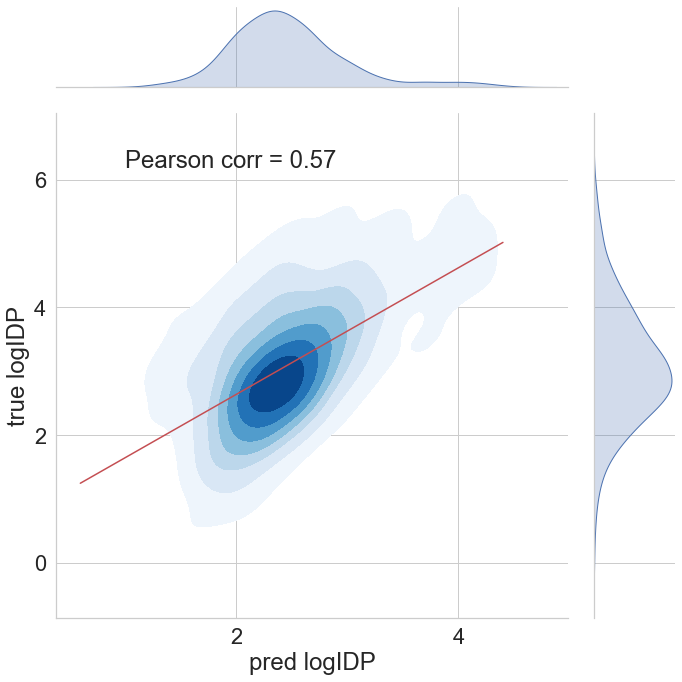

In [87]:
#sns.set_style('whitegrid')
#sns.set_style("ticks")
sns.set(font_scale = 2)
sns.set_style('whitegrid')
g = sns.jointplot(x=yp, y=yt, kind='kde', cmap='Blues', n_levels=8, fill=True, height=10)
g.ax_joint.set_xticks([0,2, 4,6])
g.ax_joint.set_yticks([0,2, 4,6])
#plt.savefig("no_clim.pdf")
g.ax_joint.text(1,6.2,r"Pearson corr = {:.2f}".format(corr))
g.ax_joint.plot(x, y, '-r')
g.ax_joint.set_xlabel("pred logIDP")
g.ax_joint.set_ylabel("true logIDP")
plt.tight_layout()
plt.savefig('./agu_plots/fit_21_sumprec.png', bbox_inches='tight', format='png', transparent=False, dpi=1100)
plt.show()

In [296]:
#import joblib
#filename = './agu_plots/rf_best.joblib.pkl'
#_ = joblib.dump(mb, filename, compress=9)

In [97]:
idcl = []
idcl.append(features.index("WS"))
idcl.append(features.index("Precipitation"))
idncl = list(set(range(len(features)))-set(idcl))

In [98]:
rncl = []
mncl = []
resncl = []
p= 0

for b in range(1000):
    indices = np.arange(X_n.shape[0])
    X_tr, X_te, Y_tr, Y_te, idxtr, idxte = train_test_split(X_n, Y_db, indices, test_size=0.3, random_state=b, stratify=Y_bin)
    m1 = RandomForestRegressor(max_depth=6, n_estimators=40, criterion="mse", min_samples_split=4, max_features=3, random_state=2)
    m1.fit(X_tr[:,idncl], Y_tr)
    m2 = RandomForestRegressor(max_depth=6, n_estimators=40, criterion="mse", min_samples_split=4, max_features=3, random_state=2)
    m2.fit(X_tr, Y_tr)
    rncl.append(m1.score(X_te[:,idncl], Y_te))
    if m1.score(X_te[:,idncl], Y_te) >= m2.score(X_te, Y_te):
        p+=1
        print("p val = ", p/(b+1))
    mse = 0
    Y_pred = m1.predict(X_te[:,idncl])

    for i in range(len(Y_pred)):
        mse += (Y_pred[i] - list(Y_te)[i])**2
        resncl.append(Y_pred[i] - list(Y_te)[i])
    mncl.append(mse/len(Y_pred))


p val =  1.0
p val =  0.04878048780487805
p val =  0.06666666666666667
p val =  0.06349206349206349
p val =  0.03546099290780142
p val =  0.0375
p val =  0.03684210526315789
p val =  0.03278688524590164
p val =  0.034482758620689655
p val =  0.034482758620689655
p val =  0.037800687285223365
p val =  0.03761755485893417
p val =  0.040625
p val =  0.043209876543209874
p val =  0.04043126684636118
p val =  0.03970223325062035
p val =  0.03177570093457944
p val =  0.03214285714285714
p val =  0.03333333333333333
p val =  0.03436426116838488
p val =  0.03541315345699832
p val =  0.03691275167785235
p val =  0.038461538461538464
p val =  0.03966942148760331
p val =  0.040453074433656956
p val =  0.0420032310177706
p val =  0.04128440366972477
p val =  0.03954802259887006
p val =  0.04084507042253521
p val =  0.04178272980501393
p val =  0.04281767955801105
p val =  0.04401650618982118
p val =  0.04319371727748691
p val =  0.04091456077015644
p val =  0.039727582292849034
p val =  0.03777544

In [99]:
print('Mean residuals, no climate:', np.mean(resncl))

Mean residuals, no climate: -0.0038534346330892635


In [104]:
np.std(resncl)

0.9355549568957395

In [100]:
print('Mean MSE, no climate:', np.mean(np.sqrt(mncl)))

Mean MSE, no climate: 0.9354142757343366


In [103]:
np.std(np.sqrt(mncl))

0.016675103689848363

In [101]:
print('Mean R2 score, no climate:', np.mean(rncl))

Mean R2 score, no climate: 0.31881573362102644


In [102]:
np.std(rncl)

0.023497112251599218

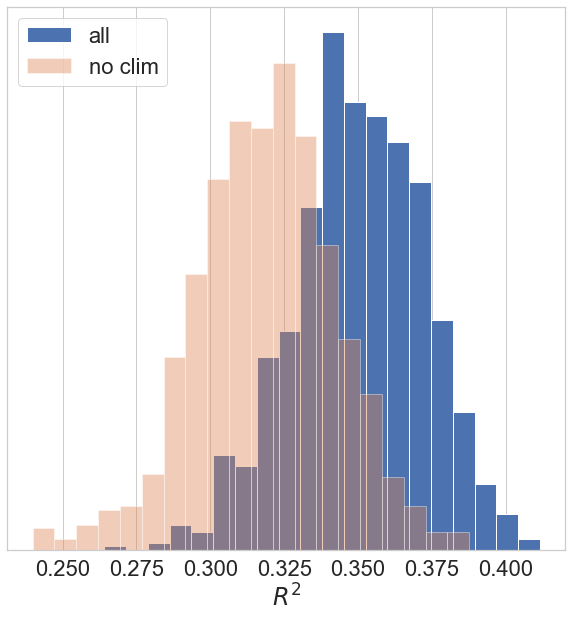

In [95]:
plt.figure(figsize=(10,10))
plt.hist(r, bins=20, density=True, label= "all")
plt.yticks([])
plt.hist(rncl, bins=20, density = True, label="no clim", alpha=0.4)
plt.yticks([])
plt.xlabel("$R^2$")
plt.legend(loc = "upper left")
#plt.savefig("./agu_plots/r_nocl.pdf")

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


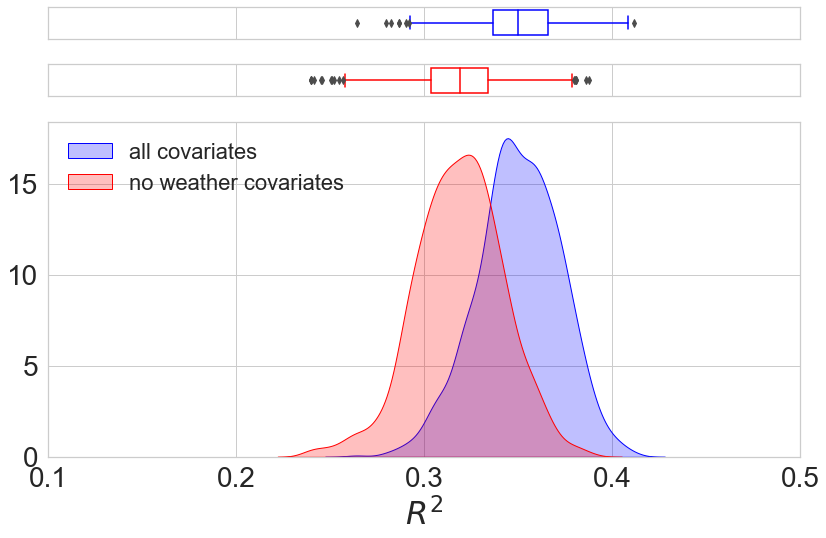

In [97]:
sns.set(font_scale=2,style="whitegrid")
# sns.set(font_scale = 1.5)
# sns.set_style("ticks")

f, (ax_box, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.08,.08, .84)},figsize = (12,8))
# sns.boxplot(data = data_try2,ax=ax_box)
# sns.boxplot(data = [r,rncl],ax=ax_box)

#     ax = sns.boxplot( data=dfs[n], ax=ax_box, width=0.2, orient='h', color=colors[n] )

# data_final = {'all':data_new[0,:], 'no weather': data_new[1,:]}
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'blue'},
    'medianprops':{'color':'blue'},
    'whiskerprops':{'color':'blue'},
    'capprops':{'color':'blue'}
}

m1 = sns.boxplot(r,ax=ax_box,**PROPS)
# plt.setp(m1.artists,fill=False)


PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'red'},
    'medianprops':{'color':'red'},
    'whiskerprops':{'color':'red'},
    'capprops':{'color':'red'}
}

m2 = sns.boxplot(rncl,ax=ax_box2,**PROPS)

# m1 = sns.boxplotdata = data_df,color ="red",ax=ax_box2)


# sns.boxplot(r,color = "blue",ax=ax_box)
# sns.boxplot(rncl,color = "red",ax=ax_box2)

p1= sns.kdeplot(r,shade = True, color ="blue", ax=ax_hist)
p2= sns.kdeplot(rncl,shade = True,color ="red",ax=ax_hist)
plt.xlabel("$R^2$",fontsize=32)
plt.ylabel('')
plt.legend(['all covariates', 'no weather covariates'],fontsize=22,loc='upper left',frameon=False)
# plt.legend(['all covariates', 'no weather covariates'],fontsize=22,frameon=False)
plt.show

p1.set_xticks([0.1, 0.2,0.3,0.4,0.5])
p1.set_xticklabels(p1.get_xticks(), size = 28)
  
# ax.set_xticks([0.1, 0.2,0.3,0.4,0.5],fontsize=24)

p1.set_yticks([0, 5,10,15])
p1.set_yticklabels(p1.get_yticks(), size = 28)
plt.tight_layout()

#plt.savefig('density_plot_new_updated.eps', format='eps')
#plt.savefig("density_plot_new_updated.pdf")
plt.savefig('./agu_plots/density_plot_new_updated.png', bbox_inches='tight', format='png', transparent=False, dpi=1100)

# SHAP Feature Explainer

In [98]:
db1.columns

Index(['iso3', 'country', 'IDP', 'hazard_type', 'start_date',
       'Precipitation_SumMax', 'Wind_Speed_Max', 'gHM', 'Elev_Mean', 'awi_max',
       'Agricultural land (% of land area)',
       'Adjusted savings: education expenditure (% of GNI)', 'kNDVI', 'logPop',
       'continent', 'year', 'logIDP'],
      dtype='object')

In [99]:
#X_trdb = pd.DataFrame(np.concatenate((Xtrb, X_teb)))
X_trdb = pd.DataFrame(X_n)

In [100]:
X_trdb.columns = features

In [101]:
X_trdb1 = pd.concat([X_trdb , db1[['continent', 'year', 'hazard_type']]], axis=1)

In [102]:
#X_trdb = X_trdb[X_trdb1["hazard_type"]=="Landslide"]

In [103]:
config = {
    "model": mb,
    "X": X_trdb, 
    "features": features,
    "type": "regressor",
    "predictor": 'AWI',
    "Xtest": X_trdb, 
    "instance": 0,
    "plot": ["local", "waterfall"], 
    "path": "./agu_plots/shap_21.pdf"
}

NameError: name 'mb' is not defined

In [149]:
sp = Shap(config)
explainer, shapley, _, _ = sp.fit()

Instance number :  baseline
Precipitation  =  -0.11436262549411833
WS  =  -0.19177593466545026
gHM  =  -0.11650149632657641
Elevation  =  -0.38776610258517646
AWI  =  -0.0825190756117499
%AgriLand  =  -0.13077012252637932
%EduExp  =  -0.1408327989512777
kNDVI  =  0.07481868711172376
Population  =  0.08170011369686676


Exact explainer: 2400it [00:35, 53.65it/s]                          


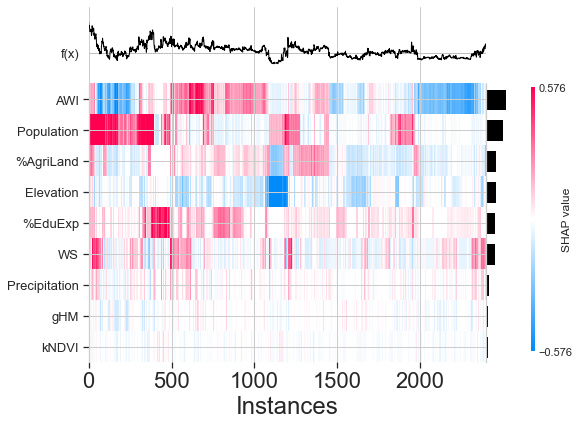

In [150]:
sp.plot(explainer, shapley, ["global", "heatmap"], 0)

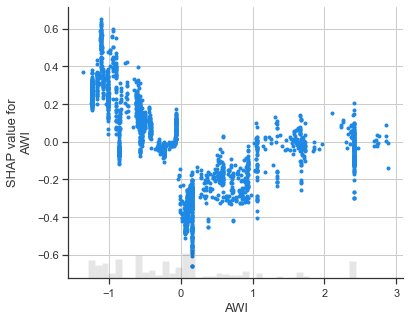

In [151]:
sp.plot(explainer, shapley, ["global", "scatter"], 0)

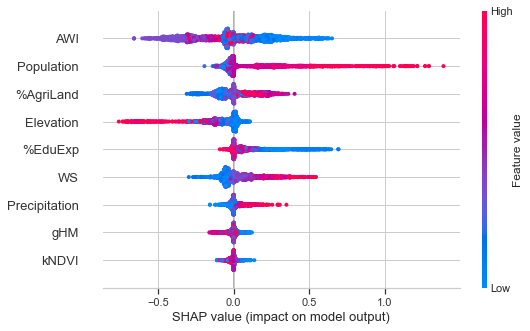

In [152]:
sp.plot(explainer, shapley, ["global", "summary"], 0)

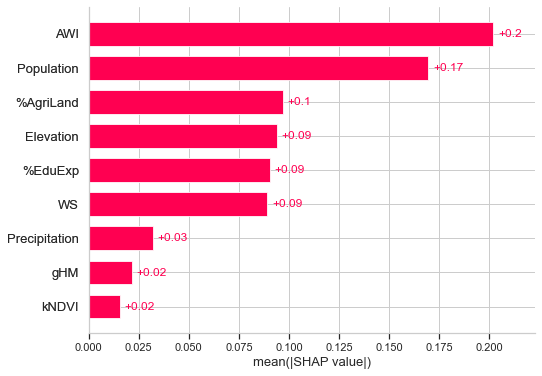

In [153]:
sp.plot(explainer, shapley, ["global", "bar"], 0)

In [115]:
allshp = shp_mat[0]
for i in range(1,1000):
    allshp = np.concatenate((allshp,shp_mat[i]), axis=0)

In [116]:
alldata = shp_data[0]
for i in range(1,1000):
    alldata = np.concatenate((alldata,shp_data[i]), axis=0)

In [117]:
dbdata = pd.DataFrame(alldata, columns=features)
dbshp = pd.DataFrame(allshp, columns=["shap_"+i for i in features])
db_unival = pd.concat([dbdata, dbshp], axis=1).groupby(features, as_index=False).agg("mean")
shp = db_unival[["shap_"+i for i in features]].values
data = db_unival[features].values

In [118]:
#mshap = np.mean(np.abs(shapley.values), axis=0)

In [119]:
mshap = np.mean(np.abs(shp), axis=0)

In [120]:
order = (-mshap).argsort()
ranks = order.argsort()

In [121]:
ranks = list(ranks)

In [122]:
order

array([4, 0, 8, 5, 6, 3, 1, 2, 7])

In [123]:
ranks

[1, 6, 7, 5, 0, 3, 4, 8, 2]

In [124]:
idx = [ranks.index(i) for i in range(len(features))]

In [125]:
print(features)

['Precipitation', 'WS', 'gHM', 'Elevation', 'AWI', '%AgriLand', '%EduExp', 'kNDVI', 'Population']


In [126]:
np.unique(alldata, axis=0).shape

(2358, 9)

In [127]:
dbdata = pd.DataFrame(alldata, columns=features)

In [143]:
dbshp = pd.DataFrame(allshp, columns=features)

In [128]:
ordered_feat = [features[ranks.index(i)] for i in range(len(features))]

In [129]:
ordered_feat

['AWI',
 'Precipitation',
 'Population',
 '%AgriLand',
 '%EduExp',
 'Elevation',
 'WS',
 'gHM',
 'kNDVI']

In [130]:
#sorted_data = shapley.data[:,idx ]
#sorted_shap = shapley.values[:,idx]
sorted_shap = shp[:,idx]
sorted_data = data[:,idx ]
attribution_column_names = ["Shap_" + x for x in features]
sorted_attribution_column_names = [attribution_column_names[ranks.index(i)] for i in range(len(features))]
sorted_features = [features[ranks.index(i)] for i in range(len(features))]

In [131]:
np.mean(np.abs(sorted_shap),axis=0)

array([0.17744955, 0.16853726, 0.12954906, 0.11015627, 0.08562937,
       0.06815604, 0.06719148, 0.02260876, 0.00662477])

In [132]:
shp = db_unival[["shap_"+i for i in features]].values
data = db_unival[features].values

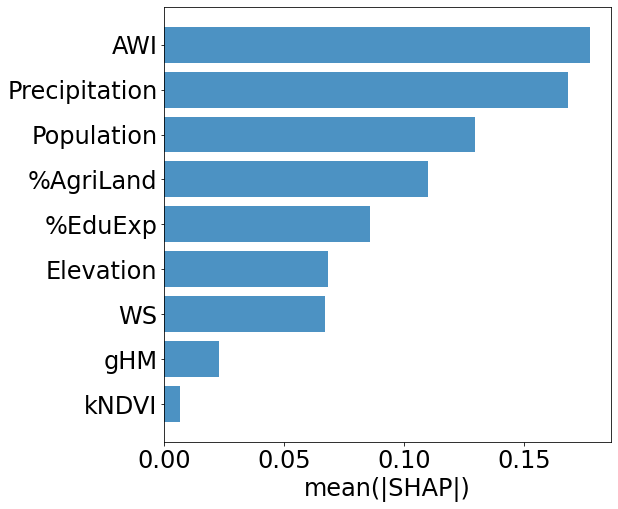

In [133]:
fig = plt.figure(figsize=(8, 8))
plt.barh(range(9)[::-1], np.mean(np.abs(sorted_shap),axis=0), align='center', alpha=0.8)
plt.yticks(range(9)[::-1], ordered_feat)
plt.xlabel('mean(|SHAP|)')
#plt.savefig('./agu_plots/avgshap_21_sumprec.pdf', bbox_inches='tight', format='pdf', transparent=False, dpi=1100)
plt.show()

In [134]:
melted_features = pd.melt(pd.DataFrame(sorted_data, columns=sorted_features),
                              value_vars=sorted_features,
                              var_name="Feature_name", value_name="Feature_value")

melted_attributions = pd.melt(pd.DataFrame(sorted_shap, 
                                  columns=sorted_attribution_column_names),
                              value_vars=sorted_attribution_column_names,#df_attributions.columns,
                              var_name="Feature_name", 
                              value_name="Attribution_value")

df_melted = melted_features.copy()
df_melted["Attribution_value"] = melted_attributions.Attribution_value 

In [135]:
font_size = 25
plt.rc('axes', titlesize=font_size)   # title
plt.rc('axes', labelsize=font_size)   # x and y labels
plt.rc('xtick', labelsize=font_size)  # x tick labels
plt.rc('ytick', labelsize=font_size)  # y tick labels
plt.rc('legend', fontsize=font_size)  # legend
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"

In [136]:
plt.rcParams["axes.labelsize"] = 25

In [137]:
#df_melted["Feature_value"] = pd.cut(df_melted["Feature_value"], 2, labels=["low", "high"])

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


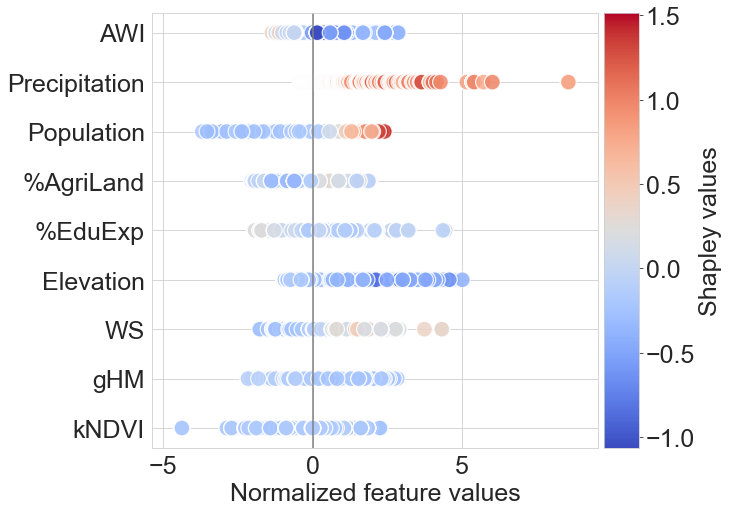

In [163]:
palette = sns.color_palette("coolwarm", as_cmap=True)
sns.set_style('whitegrid')

fig = plt.figure(figsize=(8, 8))

gs = gridspec.GridSpec(nrows=1,
                       ncols=1, 
                       figure=fig,
                       width_ratios=[1],
                       height_ratios=[1],
                       wspace=0.1,
                       hspace=0.4)

ax1 = fig.add_subplot(gs[0, 0])
g = sns.scatterplot(data=df_melted,
                           x="Feature_value",
                           y="Feature_name",
                           hue="Attribution_value",
                           palette=palette,
                           s=250, alpha=0.85,
                           ax=ax1, legend='brief')
ax1 = g.axes
ax1.axvline(0, color="grey")
g.set(xlabel="Normalized feature values", ylabel="",  xlim=(dbdata.min().min()-1.,dbdata.max().max()+1.))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.legend([],[], frameon=False)
plt.grid()
sns.set_style('whitegrid')
ax1.grid()

#norm = plt.Normalize(X_trdb.min().min(), X_trdb.max().max())
norm = plt.Normalize(dbshp.min().min(), dbshp.max().max())
cmap = palette
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cax = fig.add_axes([ax1.get_position().x1+0.01, ax1.get_position().y0, 0.06, ax1.get_position().height])
ax1.figure.colorbar(sm, cax=cax, label="Shapley values")
plt.tight_layout()
plt.grid(True)
plt.savefig('./agu_plots/allshap_21_sumprec.pdf', bbox_inches='tight', format='pdf', transparent=False, dpi=1100)
plt.ioff()

In [133]:
arr_data = scaler.inverse_transform(data)


In [134]:
features

['Precipitation',
 'WS',
 'gHM',
 'Elevation',
 'AWI',
 '%AgriLand',
 '%EduExp',
 'kNDVI',
 'Population']

In [135]:
arr_data[:,0].max()

307.2183907185025

(array([1278.,  385.,  224.,  269.,   73.,   53.,   43.,   18.,   10.,
           5.]),
 array([1.56397038e+00, 4.58145668e+02, 9.14727366e+02, 1.37130906e+03,
        1.82789076e+03, 2.28447246e+03, 2.74105416e+03, 3.19763585e+03,
        3.65421755e+03, 4.11079925e+03, 4.56738095e+03]),
 <BarContainer object of 10 artists>)

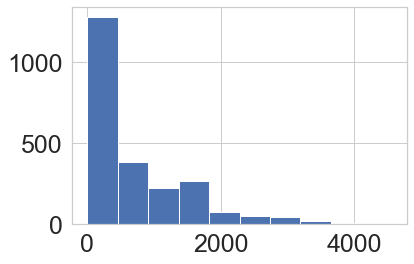

In [136]:
plt.hist(arr_data[:,3])

In [137]:
plt.rc('legend', fontsize=20)  # legend

In [219]:
#df.to_csv("./agu_plots/ws.csv") 

In [220]:
#pd.read_csv("./agu_plots/ws.csv") 

In [312]:
features

['Precipitation',
 'WS',
 'gHM',
 'Elevation',
 'AWI',
 '%AgriLand',
 '%EduExp',
 'kNDVI',
 'Population']

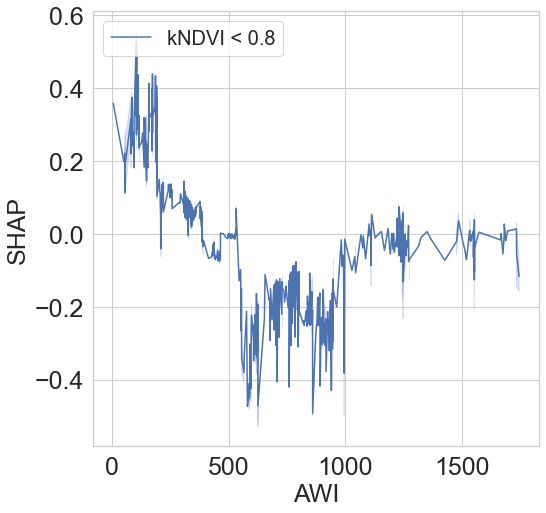

In [417]:
thr= 0.8
inter_feat = 'kNDVI'
feature_name = 'AWI'
feature_indx = features.index(feature_name)
df = pd.DataFrame(arr_data[:, feature_indx], columns=[feature_name])
df[inter_feat] = arr_data[:,features.index(inter_feat)]
#df[inter_feat] = df[inter_feat].apply(lambda x: 10**x)
df['SHAP'] = shp[:, feature_indx]
df1 = df[df[inter_feat]<thr]
df2 = df[df[inter_feat]>thr]
fig = plt.figure(figsize=(8, 8))

gs = gridspec.GridSpec(nrows=1,
                       ncols=1, 
                       figure=fig,
                       width_ratios=[1],
                       height_ratios=[1],
                       wspace=0.1,
                       hspace=0.4)

ax1 = fig.add_subplot(gs[0, 0])

g = sns.lineplot(x=feature_name, y="SHAP", data=df1, label= inter_feat+" < "+str(thr), ci='sd')
g = sns.lineplot(x=feature_name, y="SHAP", data=df2, label=inter_feat+" > "+str(thr), ci='sd')


#g.set_title("Feature value and model's predictions for " + feature_name)
plt.legend(loc="upper left")
#plt.savefig("./agu_plots/precip_elev_v0.pdf")

In [387]:
#df1["Population"] = df1["Population"].apply(lambda x: 10**x)

In [388]:
#df2["Population"] = df2["Population"].apply(lambda x: 10**x)

In [389]:
from itertools import groupby
from scipy.signal import savgol_filter

In [390]:
x = df1["kNDVI"].sort_values()
y = df1["SHAP"][x.index]

In [391]:
x2 = df2["kNDVI"].sort_values()
y2 = df2["SHAP"][x2.index]

In [392]:
xy = pd.DataFrame(list(zip(x,y)), columns=["x","y"]).groupby(['x'], as_index=False).mean()

In [393]:
xy1 = pd.DataFrame(list(zip(x2,y2)), columns=["x","y"]).groupby(['x'], as_index=False).mean()

In [394]:
x1 = np.array(xy.x)
y1 = np.array(xy.y)
x3 = np.array(xy1.x)
y3 = np.array(xy1.y)

In [399]:
yhat = savgol_filter(y1, 81, 3) # window size 51, polynomial order 
yhat1 = savgol_filter(y3, 81, 3) # window size 51, polynomial order 

-0.0070564715708037766


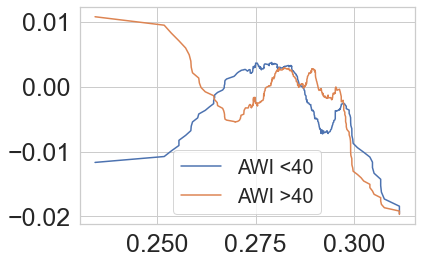

In [400]:
print(max(yhat)-max(yhat1))
plt.plot(x1, yhat, label="AWI <"+str(thr))
plt.plot(x3, yhat1, label="AWI >"+str(thr))
plt.legend()
plt.show()

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


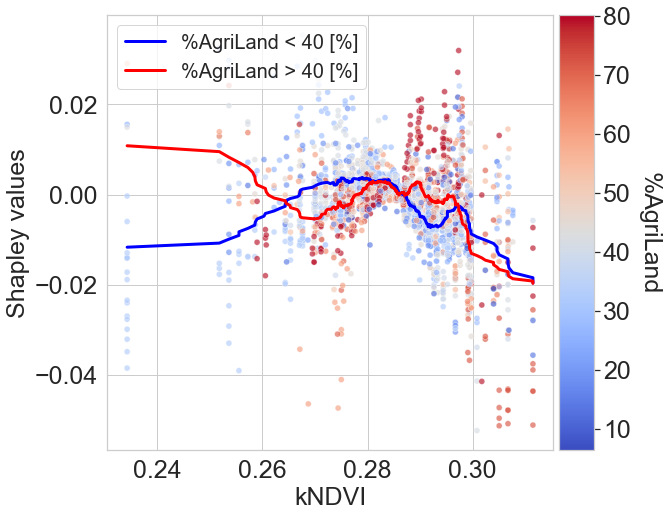

In [401]:
feature_name = 'kNDVI'
feature_indx = features.index(feature_name)
df = pd.DataFrame(arr_data[:, feature_indx], columns=[feature_name + ""])
df[inter_feat] = arr_data[:,features.index(inter_feat)]
df['Shapley values'] = shp[:, feature_indx]
#df[feature_name + " [counts]"] = df[feature_name + " [counts]"].apply(lambda x: 10**x)

fig = plt.figure(figsize=(8, 8))

gs = gridspec.GridSpec(nrows=1,
                       ncols=1, 
                       figure=fig,
                       width_ratios=[1],
                       height_ratios=[1],
                       wspace=0.1,
                       hspace=0.4)

ax1 = fig.add_subplot(gs[0, 0])
palette = sns.color_palette("coolwarm", as_cmap=True)

g = sns.scatterplot(data=df, x=feature_name + "", y="Shapley values", hue=inter_feat, palette=palette, alpha=0.65, legend = False)

#g.set_title("Feature value and model's predictions for " + feature_name)
plt.plot(x1, yhat, label=inter_feat+" < "+str(thr) +" [%]", color="blue", linewidth=3.0)
plt.plot(x3, yhat1, label=inter_feat+" > "+str(thr) + " [%]", color="red", linewidth=3.0)
plt.legend(loc="upper left")
plt.grid()
ax1.grid()

norm = plt.Normalize(df[inter_feat].min(), df[inter_feat].max())
cmap = palette
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cax = fig.add_axes([ax1.get_position().x1+0.01, ax1.get_position().y0, 0.06, ax1.get_position().height])
ax1.figure.colorbar(sm, cax=cax)
cax.set_ylabel(inter_feat, rotation=270, labelpad=30)
plt.tight_layout()
plt.grid(True)
plt.savefig('./agu_plots/ndvi_agri_21_sumprec.png', bbox_inches='tight', format='png', transparent=False, dpi=1100)


plt.ioff()

# Feature permutation

In [108]:
config = {
    "model": mb,
    "X": np.concatenate((Xtrb, X_teb)), 
    "y": np.concatenate((Y_trb, Y_teb)),
    "type": "predict",
    "features": features,
    "Np": 200,
    "cost": "mse", 
    "path": "./agu_plots/perm.pdf"
}

In [109]:
fp = FeaturePermutation(config)
fi = fp.fit()

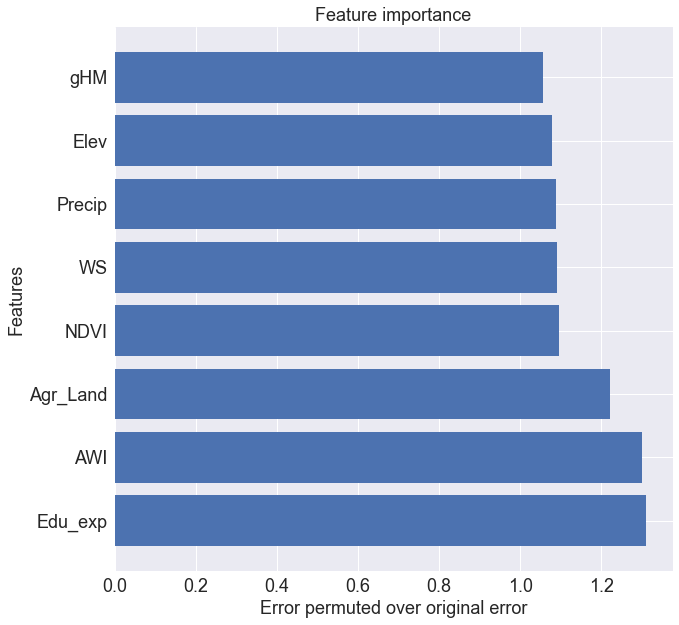

In [110]:
fp.plot(fi["RESULT"])

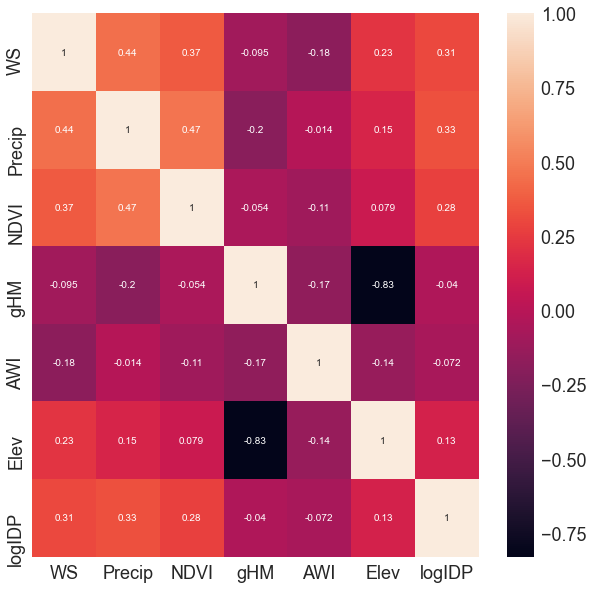

In [115]:
db_corr = X_db
db_corr["logIDP"] = Y_db
plt.figure(figsize=(10,10))
corrMatrix = db_corr.corr()
ax = sns.heatmap(corrMatrix, annot=True)
plt.savefig('./agu_plots/corr.pdf', bbox_inches='tight')